# Passo 1: Pré processamento e EDA

## Importação de bibliotecas

In [1]:
# Bibliotecas para manipulação de dados e plots
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas para preprocessamento e métricas de avaliação de modelos
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,roc_curve,roc_auc_score,confusion_matrix,plot_confusion_matrix,roc_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer,StandardScaler
from sklearn.feature_selection import mutual_info_classif

# Bibliotecas com os modelos de classificação
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#Biblioteca para otimização de hiperparâmetros
import optuna
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice


# Configurações para padronização dos gráficos
# Para ver todos os parâmetros usar o comando plt.rcParams.keys()
sns.set(rc={
                    'axes.labelsize': 12.0,
                    'axes.titlecolor': 'black',
                    'axes.titleweight': 'bold',
                    'axes.labelweight': 'bold',
                    'axes.titlesize': 20.0,
                    'figure.figsize': [15,10],
                    'figure.titlesize': 'xx-large',
                    'figure.titleweight': 'bold',
                    })

## Analisando a consistência dos dados

In [2]:
#Lendo os datasets que serão trabalhados
df_inicial = pd.read_csv('COVID.csv')
df_prod_inicial = pd.read_csv('COVID_subm.csv')

In [3]:
#verificando se existe algum dado duplicado
df_inicial[df_inicial.duplicated()], df_prod_inicial[df_prod_inicial.duplicated()]

(Empty DataFrame
 Columns: [Unnamed: 0, sex, patient_type, intubed, pneumonia, age, pregnancy, diabetes, copd, asthma, inmsupr, hypertension, other_disease, cardiovascular, obesity, renal_chronic, tobacco, contact_other_covid, covid_res, icu]
 Index: [],
 Empty DataFrame
 Columns: [Unnamed: 0, sex, patient_type, intubed, pneumonia, age, pregnancy, diabetes, copd, asthma, inmsupr, hypertension, other_disease, cardiovascular, obesity, renal_chronic, tobacco, contact_other_covid, icu]
 Index: [])

Como não existem dados duplicados já droparemos a coluna de ID do paciente

In [4]:
df_inicial = df_inicial.iloc[:,1:]
df_prod_inicial = df_prod_inicial.iloc[:,1:]

In [5]:
df_inicial.head().T #Dataset foi transposto somente para facilitar a visulização

0     1     2     3     4
sex                   0.0   0.0   1.0   0.0   1.0
patient_type          1.0   1.0   0.0   0.0   0.0
intubed               NaN   NaN   0.0   0.0   0.0
pneumonia             0.0   0.0   0.0   1.0   0.0
age                  27.0  24.0  54.0  30.0  60.0
pregnancy             NaN   NaN   0.0   NaN   0.0
diabetes              0.0   0.0   0.0   0.0   1.0
copd                  0.0   0.0   0.0   0.0   0.0
asthma                0.0   0.0   0.0   0.0   0.0
inmsupr               0.0   0.0   0.0   0.0   0.0
hypertension          0.0   0.0   0.0   0.0   1.0
other_disease         0.0   0.0   0.0   0.0   0.0
cardiovascular        0.0   0.0   0.0   0.0   1.0
obesity               0.0   0.0   1.0   0.0   0.0
renal_chronic         0.0   0.0   0.0   0.0   0.0
tobacco               0.0   0.0   0.0   0.0   0.0
contact_other_covid   0.0   NaN   NaN   NaN   NaN
covid_res             1.0   1.0   1.0   1.0   1.0
icu                   NaN   NaN   0.0   0.0   0.0

In [6]:
df_prod_inicial.head().T #Dataset foi transposto somente para facilitar a visulização

0     1     2     3     4
sex                   1.0   0.0   0.0   1.0   0.0
patient_type          1.0   1.0   1.0   1.0   0.0
intubed               NaN   NaN   NaN   NaN   0.0
pneumonia             0.0   0.0   0.0   0.0   0.0
age                  35.0  26.0  57.0  40.0  55.0
pregnancy             0.0   NaN   NaN   0.0   NaN
diabetes              0.0   0.0   0.0   0.0   0.0
copd                  0.0   0.0   0.0   0.0   0.0
asthma                0.0   0.0   0.0   0.0   0.0
inmsupr               0.0   0.0   0.0   0.0   0.0
hypertension          0.0   0.0   0.0   0.0   0.0
other_disease         0.0   0.0   0.0   0.0   0.0
cardiovascular        0.0   0.0   0.0   0.0   0.0
obesity               1.0   0.0   0.0   0.0   0.0
renal_chronic         0.0   0.0   0.0   0.0   0.0
tobacco               0.0   0.0   0.0   0.0   0.0
contact_other_covid   1.0   NaN   0.0   NaN   NaN
icu                   NaN   NaN   NaN   NaN   0.0

In [7]:
# verificando o tipo de cada coluna e a presença ou ausência de missings
df_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499692 entries, 0 to 499691
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sex                  499692 non-null  int64  
 1   patient_type         499692 non-null  int64  
 2   intubed              107424 non-null  float64
 3   pneumonia            499681 non-null  float64
 4   age                  499692 non-null  int64  
 5   pregnancy            245258 non-null  float64
 6   diabetes             498051 non-null  float64
 7   copd                 498246 non-null  float64
 8   asthma               498250 non-null  float64
 9   inmsupr              498030 non-null  float64
 10  hypertension         498203 non-null  float64
 11  other_disease        497499 non-null  float64
 12  cardiovascular       498183 non-null  float64
 13  obesity              498222 non-null  float64
 14  renal_chronic        498216 non-null  float64
 15  tobacco          

O dataset tem um volume expressivo de linhas e 19 colunas, sendo que algumas delas tem um elevado volume de missings. Todas as colunas são numéricas

In [8]:
df_prod_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  1000 non-null   int64  
 1   patient_type         1000 non-null   int64  
 2   intubed              229 non-null    float64
 3   pneumonia            1000 non-null   float64
 4   age                  1000 non-null   int64  
 5   pregnancy            482 non-null    float64
 6   diabetes             996 non-null    float64
 7   copd                 997 non-null    float64
 8   asthma               996 non-null    float64
 9   inmsupr              997 non-null    float64
 10  hypertension         997 non-null    float64
 11  other_disease        997 non-null    float64
 12  cardiovascular       997 non-null    float64
 13  obesity              996 non-null    float64
 14  renal_chronic        997 non-null    float64
 15  tobacco              996 non-null    fl

O dataset de produção tem volume de dados bem menor e não tem a coluna que diz se a pessoa pegou covid ou não, como esperado. Em relação ao tipo de dados, todos são numéricos também e temos algumas colunas com % elevado de missings

In [9]:
# Para verificar o % de missings dos dois datasets e ordenar pelo volume de dados faltantes
display('#################### Missings de treino (%) ####################',
        df_inicial.isna().mean().sort_values(ascending=False),
        '#################### Missings de produção (%) ####################',
        df_prod_inicial.isna().mean().sort_values(ascending=False))

'#################### Missings de treino (%) ####################'

icu                    0.785022
intubed                0.785020
pregnancy              0.509182
contact_other_covid    0.307539
other_disease          0.004389
inmsupr                0.003326
diabetes               0.003284
tobacco                0.003160
cardiovascular         0.003020
hypertension           0.002980
renal_chronic          0.002954
obesity                0.002942
copd                   0.002894
asthma                 0.002886
pneumonia              0.000022
patient_type           0.000000
age                    0.000000
covid_res              0.000000
sex                    0.000000
dtype: float64

'#################### Missings de produção (%) ####################'

icu                    0.771
intubed                0.771
pregnancy              0.518
contact_other_covid    0.330
tobacco                0.004
diabetes               0.004
asthma                 0.004
obesity                0.004
other_disease          0.003
renal_chronic          0.003
cardiovascular         0.003
inmsupr                0.003
hypertension           0.003
copd                   0.003
patient_type           0.000
age                    0.000
pneumonia              0.000
sex                    0.000
dtype: float64

As colunas com dados missings no dataset são:
- icu
- intubed
- pregnancy
- contact_other_covid
- other_disease
- inmsupr
- diabetes
- tabacco
- cardiovascular
- hypertension
- renal_chronic
- obesity
- copd
- asthma
- pneumonia

E no dataset de produção temos:
- icu                    
- intubed                
- pregnancy              
- contact_other_covid    
- tobacco                
- diabetes               
- asthma                 
- obesity                
- other_disease          
- renal_chronic          
- cardiovascular         
- inmsupr                
- hypertension           
- copd

Iremos olhar para cada uma dessas colunas e implementar uma estratégia de tratamento de missings

As colunas icu (internação na uti) e intubed (paciente foi intubado ou não) tem grande relação já que as intubações ocorrem na uti

In [10]:
df_inicial[['icu','intubed','patient_type']]

icu  intubed  patient_type
0       NaN      NaN             1
1       NaN      NaN             1
2       0.0      0.0             0
3       0.0      0.0             0
4       0.0      0.0             0
...     ...      ...           ...
499687  NaN      NaN             1
499688  0.0      1.0             0
499689  NaN      NaN             1
499690  NaN      NaN             1
499691  NaN      NaN             1

[499692 rows x 3 columns]

In [11]:
df_prod_inicial[['icu','intubed','patient_type']]

icu  intubed  patient_type
0    NaN      NaN             1
1    NaN      NaN             1
2    NaN      NaN             1
3    NaN      NaN             1
4    0.0      0.0             0
..   ...      ...           ...
995  NaN      NaN             1
996  NaN      NaN             1
997  NaN      NaN             1
998  NaN      NaN             1
999  NaN      NaN             1

[1000 rows x 3 columns]

In [12]:

print('Missings ICU que foram dispensados (1) ou internados (0)')
#Dataset filtrado somente onde ICU é missing
df_experimental = df_inicial.loc[df_inicial['icu'].isnull(),['patient_type','covid_res']]
print(df_experimental['patient_type'].value_counts())

print('Missings intubed que foram dispensados (1) ou internados (0)')
#Dataset filtrado somente onde intubed é missing
df_experimental = df_inicial.loc[df_inicial['intubed'].isnull(),['patient_type','covid_res']]
print(df_experimental['patient_type'].value_counts())

Missings ICU que foram dispensados (1) ou internados (0)
1    392146
0       123
Name: patient_type, dtype: int64
Missings intubed que foram dispensados (1) ou internados (0)
1    392146
0       122
Name: patient_type, dtype: int64


É possível perceber que a maioria dos pacientes com ICU e intubed missing foram dispensados para casa, ou seja, não passaram pela ICU e não precisaram ser intubados, neles o preenchimento será feito com 0. No entanto alguns pacientes foram internados. Como o número de pacientes internados missing em ICU e em intubed é o mesmo, vamos considerar que esses pacientes foram internados na ICU e entubados, preenchendo esses casos com 1

Vamos agora olhar para a coluna pregnancy

In [14]:
# Mascaras para filtrar somente pelas colunas onde o sexo é homem e mulher
mask_male = df_inicial['sex']==0
mask_female = df_inicial['sex']==1

display(df_inicial.loc[mask_male,['pregnancy','sex']],
        df_inicial.loc[mask_female,['pregnancy','sex']])

pregnancy  sex
0             NaN    0
1             NaN    0
3             NaN    0
5             NaN    0
6             NaN    0
...           ...  ...
499679        NaN    0
499681        NaN    0
499683        NaN    0
499687        NaN    0
499688        NaN    0

[253098 rows x 2 columns]

pregnancy  sex
2             0.0    1
4             0.0    1
7             0.0    1
8             0.0    1
9             0.0    1
...           ...  ...
499685        0.0    1
499686        0.0    1
499689        0.0    1
499690        0.0    1
499691        0.0    1

[246594 rows x 2 columns]

In [15]:
# verificando a quantidade de dados missings de acordo com o sexo
display(
    df_inicial.loc[mask_male,['pregnancy','sex']].isna().mean(),
    df_inicial.loc[mask_female,['pregnancy','sex']].isna().mean()
)

pregnancy    1.0
sex          0.0
dtype: float64

pregnancy    0.005418
sex          0.000000
dtype: float64

Quando o sex é masculino, os missings são devidos aos homens não ficarem grávidos e dessa forma terão seus valores preenchidos com 0. Para as mulheres um volume bem pouco expressivo de missings ainda existe e vamos analisar se temos alguma coluna que tem alta correlação com a coluna de pregancy

<AxesSubplot:>

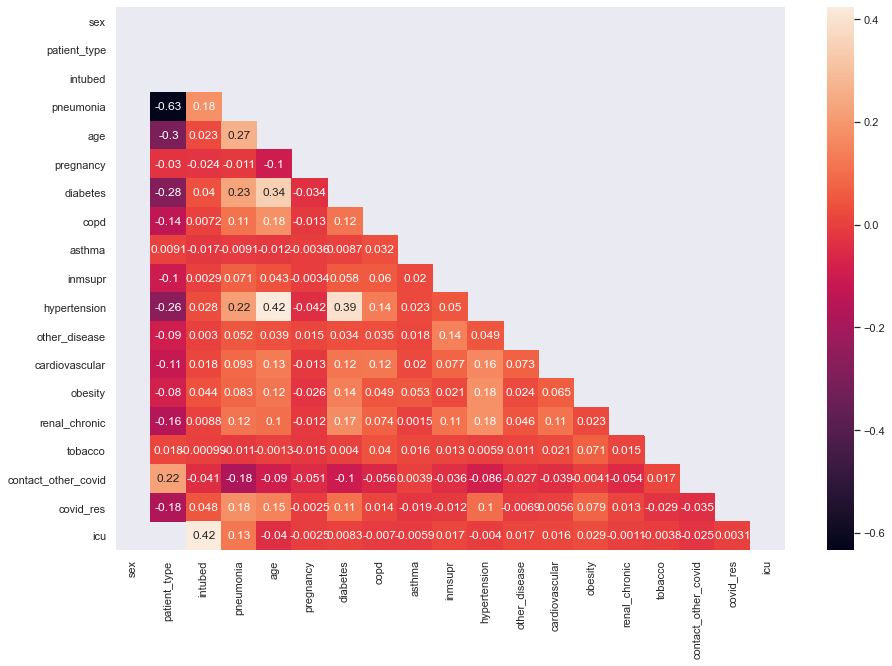

In [16]:

#criando a matriz de correlação para o dataset somente das pacientes mulheres
corr_matrix = df_inicial.loc[mask_female,:].corr()
#plotando o heatmap para facilitar a visulização. A mascara foi usada para cortar a matriz ao meio e deixar
#a visualização menos poluída
sns.heatmap(corr_matrix,annot=True,mask=np.triu(corr_matrix))

Nenhuma coluna apresenta alta correlação com a coluna pregnancy e como o volume de missings é pouco expressivo faremos o preenchimento com a moda.

A proxima coluna analisada será se o paciente teve contato com outros pacientes com covid

Um possível estratégia aqui seria olhar para a coluna do resultado do teste com covid e caso o teste dê positivo assumir que a pessoa teve contato com alguém com covid. No entanto essa abordagem teria alguns erros, sendo eles:
- target leak
- impossibilidade de realizar o mesmo preenchimento na base de produção
- assumir algo que pode não ser verdade já que a contaminação pode ter ocorrido sem contato com outra pessoa

Dessa forma, faremos o preenchimento com base na moda

O restante das colunas com missings faremos o preenchimento de forma semelhante, já que é um baixíssimo percentual de missings

Para deixar nosso código mais organizado, irei reunir em uma função todos os tratamentos de missings

In [16]:
def cleaning (df_inicial,df_prod_inicial):
    '''
    Função recebe o dataset inicial e o dataset inicial de produção. Realiza o tratamento dos dados missings
    e retorna os datasets tratados
    '''
    
    #Criando novos data set para que os antigos fiquem preservados
    df_tratado = df_inicial.copy()
    df_prod_tratado = df_prod_inicial.copy()

    # 1) Preenchimento de missings das colunas icu e intubed
    #Colunas icu e intubed com paciente dispensados recebem 0 e com pacientes internados recebem 1
    df_tratado.loc[((df_tratado['patient_type']==1) & (df_tratado['icu'].isnull())),'icu'] = 0
    df_tratado.loc[((df_tratado['patient_type']==1) & (df_tratado['intubed'].isnull())),'intubed'] = 0
    
    df_tratado.loc[((df_tratado['patient_type']==0) & (df_tratado['icu'].isnull())),'icu'] = 1
    df_tratado.loc[((df_tratado['patient_type']==0) & (df_tratado['intubed'].isnull())),'intubed'] = 1

    df_prod_tratado.loc[((df_prod_tratado['patient_type']==1) & (df_prod_tratado['icu'].isnull())),'icu'] = 0
    df_prod_tratado.loc[((df_prod_tratado['patient_type']==1) & (df_prod_tratado['intubed'].isnull())),'intubed'] = 0
    
    df_prod_tratado.loc[((df_prod_tratado['patient_type']==0) & (df_prod_tratado['icu'].isnull())),'icu'] = 1
    df_prod_tratado.loc[((df_prod_tratado['patient_type']==0) & (df_prod_tratado['intubed'].isnull())),'intubed'] = 1

    # 2) Preenchimento de missings da coluna pregnancy
    mask_male = df_inicial['sex']==0
    mask_female = df_inicial['sex']==1
    mode_female = df_inicial.loc[mask_female,'pregnancy'].mode()[0] #calculando a moda
    
    #Preenchimento das colunas de sexo masculino
    df_tratado.loc[((mask_male) & (df_tratado['pregnancy'].isnull())),'pregnancy'] = 0
    df_prod_tratado.loc[((mask_male) & (df_prod_tratado['pregnancy'].isnull())),['pregnancy']] = 0
    
    #Preenchimento das colunas de sexo femino
    #Os dados de produção serão preenchidos usando os dados que usaremos para treino para que nossos
    #modelos não tenham qualquer tipo de contato com dados de produção
    df_tratado.loc[((mask_female) & (df_tratado['pregnancy'].isnull())),'pregnancy'] = mode_female
    df_prod_tratado.loc[((mask_female) & (df_prod_tratado['pregnancy'].isnull())),'pregnancy'] = mode_female
    
    # 3) Preenchimento de missings das colunas restantes
    colunas_missing = ['contact_other_covid', 'other_disease', 'inmsupr', 'diabetes',
       'tobacco', 'cardiovascular', 'hypertension', 'renal_chronic', 'obesity',
       'copd', 'asthma', 'pneumonia']
    
    for coluna in colunas_missing:
        #Os dados de produção serão preenchidos usando os dados que usaremos para treino para que nossos
        #modelos não tenham qualquer tipo de contato com dados de produção
        mode = df_tratado[coluna].mode()[0]
        #Preenche os missings com a moda
        df_tratado.loc[df_tratado[coluna].isnull(),coluna] = mode
        #Preenche os missings com a moda
        df_prod_tratado.loc[df_prod_tratado[coluna].isnull(),coluna] = mode
        
    return df_tratado, df_prod_tratado

In [17]:
#Chamando a função e criando os datasets tratados
df_tratado, df_prod_tratado = cleaning(df_inicial,df_prod_inicial)

In [18]:
display(
        df_tratado.isna().sum(),
        df_prod_tratado.isna().sum()
        )

sex                    0
patient_type           0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

sex                    0
patient_type           0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
icu                    0
dtype: int64

Agora todos os dados missings foram tratados, vamos olhar para os outliers

In [19]:
#Para visualizarmos as principais métricas
df_tratado.describe().T

count       mean        std  min   25%   50%   75%  \
sex                  499692.0   0.493492   0.499958  0.0   0.0   0.0   1.0   
patient_type         499692.0   0.784775   0.410978  0.0   1.0   1.0   1.0   
intubed              499692.0   0.018461   0.134613  0.0   0.0   0.0   0.0   
pneumonia            499692.0   0.157529   0.364299  0.0   0.0   0.0   0.0   
age                  499692.0  42.545942  16.640391  0.0  31.0  41.0  53.0   
pregnancy            499692.0   0.007232   0.084736  0.0   0.0   0.0   0.0   
diabetes             499692.0   0.124775   0.330464  0.0   0.0   0.0   0.0   
copd                 499692.0   0.016562   0.127624  0.0   0.0   0.0   0.0   
asthma               499692.0   0.032448   0.177187  0.0   0.0   0.0   0.0   
inmsupr              499692.0   0.016152   0.126060  0.0   0.0   0.0   0.0   
hypertension         499692.0   0.162780   0.369165  0.0   0.0   0.0   0.0   
other_disease        499692.0   0.030803   0.172784  0.0   0.0   0.0   0.0   
cardiovascular       499692.0   0.022852   0.149432  0.0   0.0   0.0   0.0   
obesity              499692.0   0.163959   0.370239  0.0   0.0   0.0   0.0   
renal_chronic        499692.0   0.020050   0.140173  0.0   0.0   0.0   0.0   
tobacco              499692.0   0.085963   0.280310  0.0   0.0   0.0   0.0   
contact_other_covid  499692.0   0.701714   0.457506  0.0   0.0   1.0   1.0   
covid_res            499692.0   0.441586   0.496577  0.0   0.0   0.0   1.0   
icu                  499692.0   0.018275   0.133945  0.0   0.0   0.0   0.0   

                       max  
sex                    1.0  
patient_type           1.0  
intubed                1.0  
pneumonia              1.0  
age                  120.0  
pregnancy              1.0  
diabetes               1.0  
copd                   1.0  
asthma                 1.0  
inmsupr                1.0  
hypertension           1.0  
other_disease          1.0  
cardiovascular         1.0  
obesity                1.0  
renal_chronic          1.0  
tobacco                1.0  
contact_other_covid    1.0  
covid_res              1.0  
icu                    1.0

Tirando a coluna idade, parece que todos os dados estão consistentes. Vamos analisar a coluna idade mais de perto

Na coluna idade temos várias idades com 0 anos, o que podem ser bebes mas vale a pena investigar. Também temos pessoas com mais de 100 anos, o que não é comum.

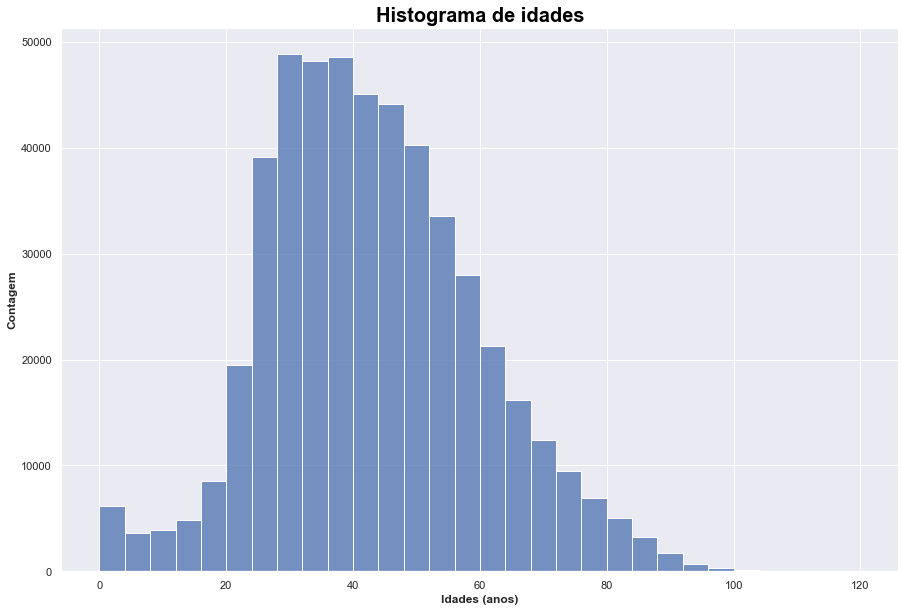

In [20]:
graph = sns.histplot(data=df_tratado,x='age',bins=30);
graph.set_title('Histograma de idades')
graph.set_xlabel('Idades (anos)')
graph.set_ylabel('Contagem');

A Maior parte das pessoas fazendo os testes se encontra entre 40 e 55 anos de idade. Muita gente fora do grupo de risco (60 anos)

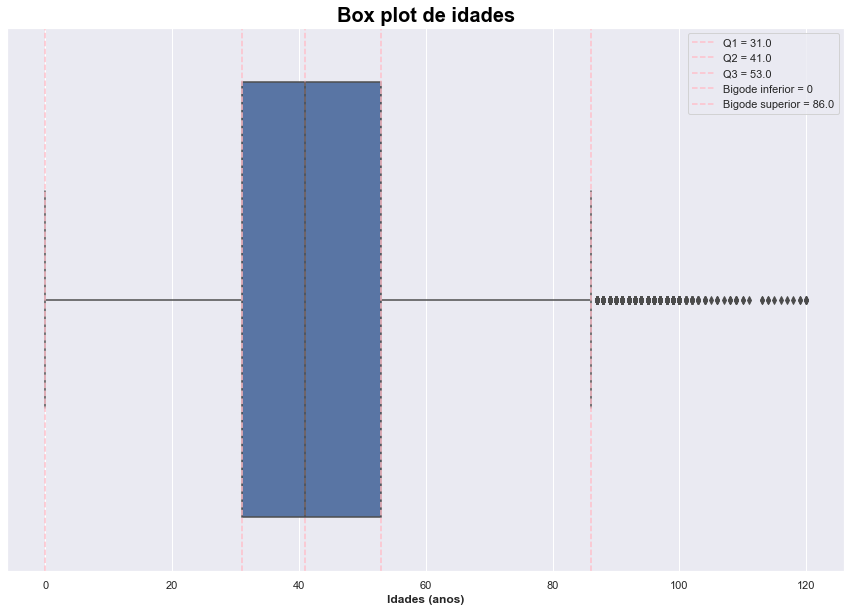

In [21]:
#Criando um boxplot com as idades
graph = sns.boxplot(data=df_tratado,x='age')
graph.set_title('Box plot de idades')
graph.set_xlabel('Idades (anos)')

#calculando cada quantil, as distâncias interquantis e os bigodes
q1 = np.quantile(a=df_tratado['age'],q = 0.25)
q2 = np.quantile(a=df_tratado['age'],q = 0.5)
q3 = np.quantile(a=df_tratado['age'],q = 0.75)
interquantile_dist = 1.5*(q3-q1)
bigode_superior = q3 + interquantile_dist
bigode_inferior = df_tratado['age'].min()

#plotando as linhas vertificais para mostrando onde cada distância se encontra
graph.axvline(x= q1,label=f'Q1 = {q1}',color='pink',ls='--')
graph.axvline(x= q2,label=f'Q2 = {q2}',color='pink',ls='--')
graph.axvline(x= q3,label=f'Q3 = {q3}',color='pink',ls='--')
graph.axvline(x= bigode_inferior,label=f'Bigode inferior = {bigode_inferior}',color='pink',ls='--')
graph.axvline(x= bigode_superior,label=f'Bigode superior = {bigode_superior}',color='pink',ls='--')

graph.legend();

Idades acima de 86 anos estão sendo consideradas outliers. Vamos analisar o volume de idades acima desse número

In [22]:
#Criando um filtro para idades acima de 86
filter = df_tratado['age']>86

#Calculando o volume de outliers (acima do bigode superior)
num_out = df_tratado.loc[filter,:].shape[0]
relevância = num_out/ df_tratado.shape[0]

print('vol de outliers idade: ',num_out)
print(f'relevância outliers idade: {relevância*100:.2f} %')

vol de outliers idade:  3588
relevância outliers idade: 0.72 %


Um volume bem pouco relevante. Por hora iremos mantê-los no nosso dataset. Agora iremos iniciar o processo de EDA

## EDA

Vamos começar analisando o balanceamento da nossa variável target

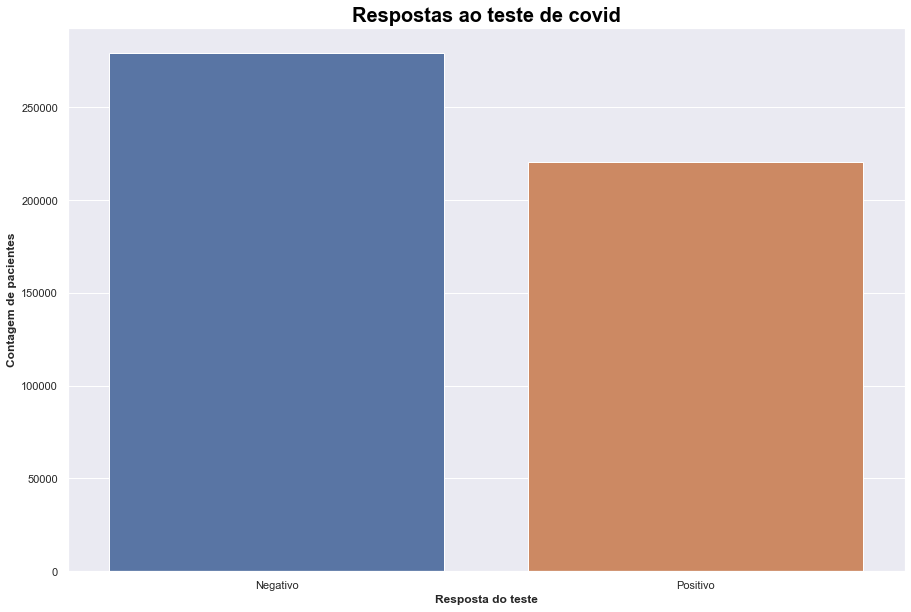

In [23]:
#Criando uma cópia da coluna target e atribuindo a variável y
y = df_tratado['covid_res'].copy()

#Criando um countplot
graph = sns.countplot(x=y)
graph.set_title('Respostas ao teste de covid')
graph.set_xlabel('Resposta do teste')
graph.set_ylabel('Contagem de pacientes')
graph.set_xticklabels(['Negativo','Positivo']);

In [24]:
print("Percentual de cada resultado do teste: (0) - Negativo e (1) - Positivo")
df_tratado['covid_res'].value_counts(normalize=True)

Percentual de cada resultado do teste: (0) - Negativo e (1) - Positivo


0    0.558414
1    0.441586
Name: covid_res, dtype: float64

A amostra está balanceada

<AxesSubplot:>

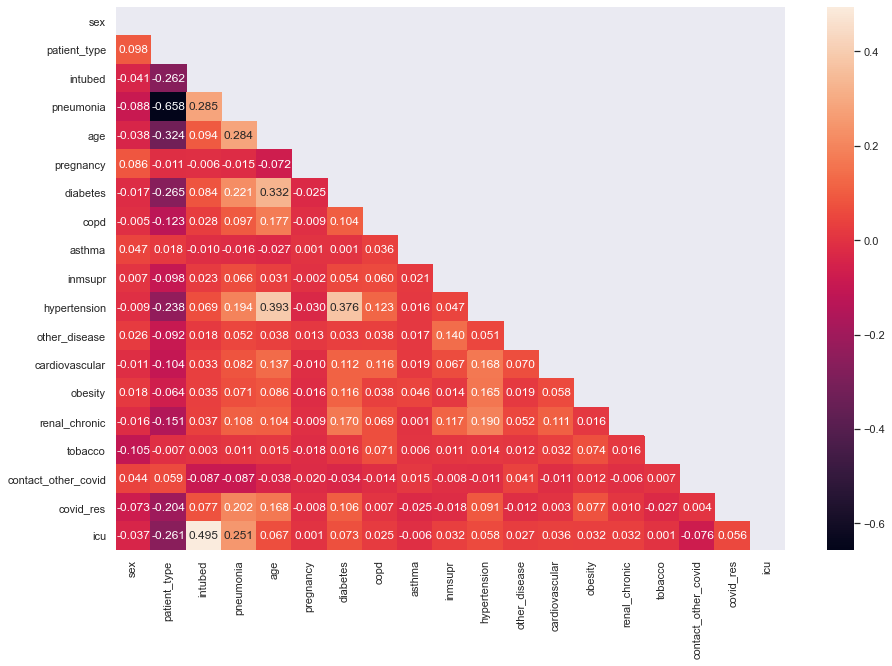

In [25]:
#varíavel que armazena a matriz de correlação
data = df_tratado.corr()
# a mascara foi usada para remover a parte de cima da matriz de correlação
mask = np.triu(data)
# o parâmetro fmt foi usado para deixar 3 casas decimais
sns.heatmap(data=data,annot=True,mask=mask,fmt='.3f')

Usamos o heatmap ao invés do pairplot devido a maioria das variáveis serem binárias, dessa forma o pairplot não seria de muita utilidade. Vemos que a intubação tem uma correlação mediana com a internação na icu e que a pneumonia tem uma correlação interessante com a intubação. O restante dos dados tem uma correlação bem fraca

Vamos olhar como está a proporção entre cada um dos valores das colunas

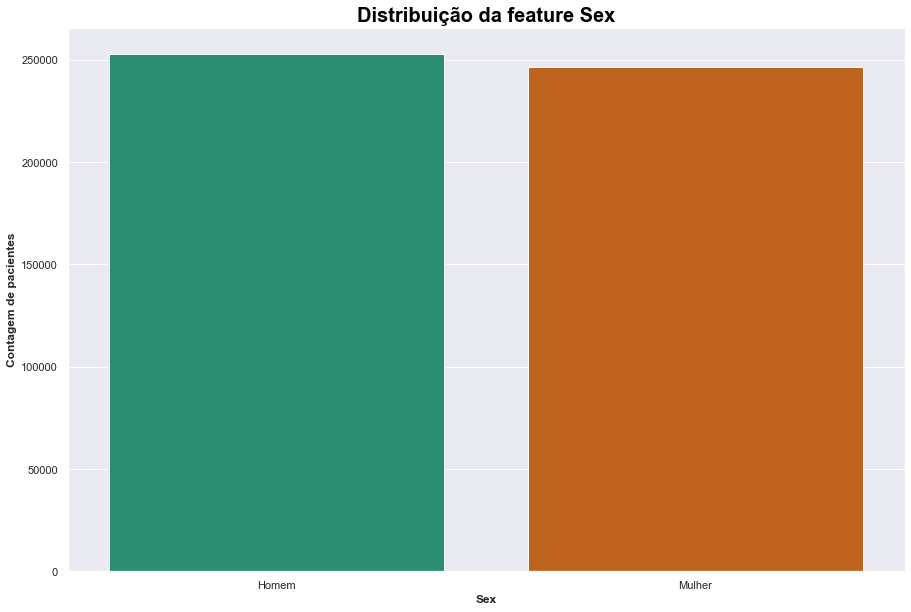

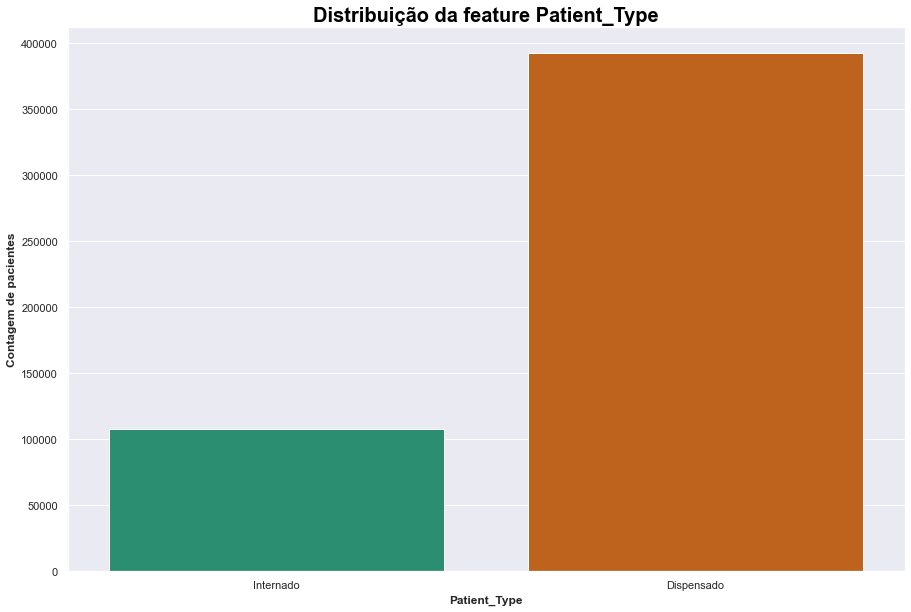

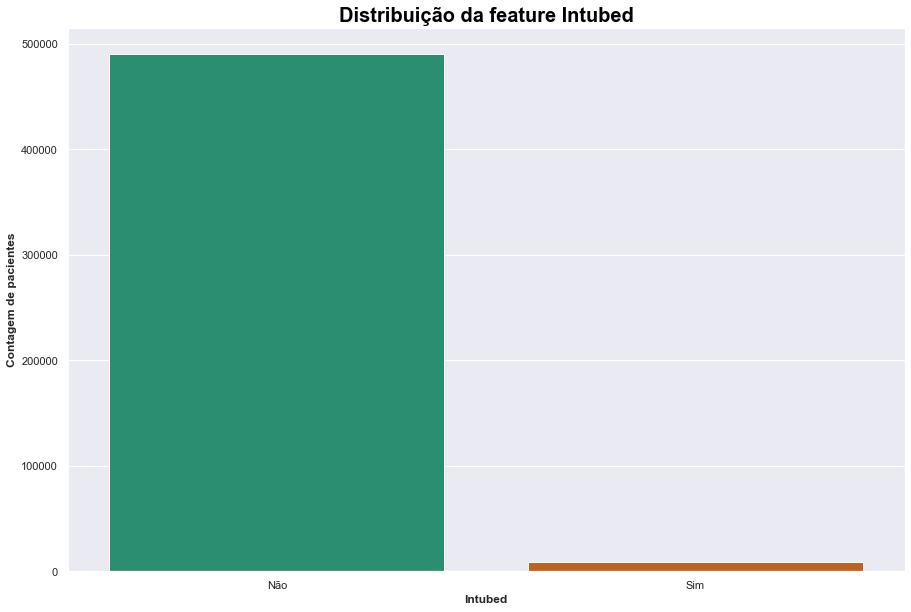

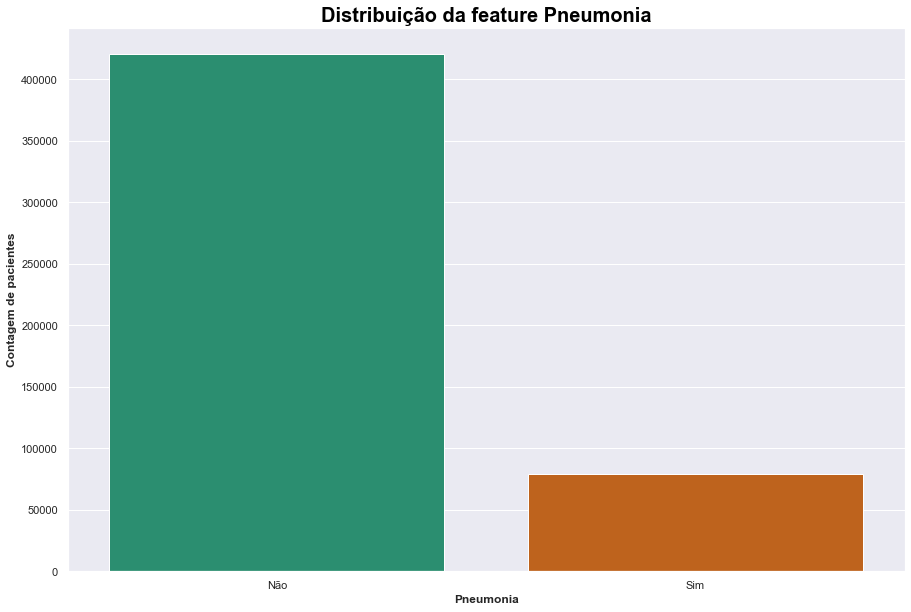

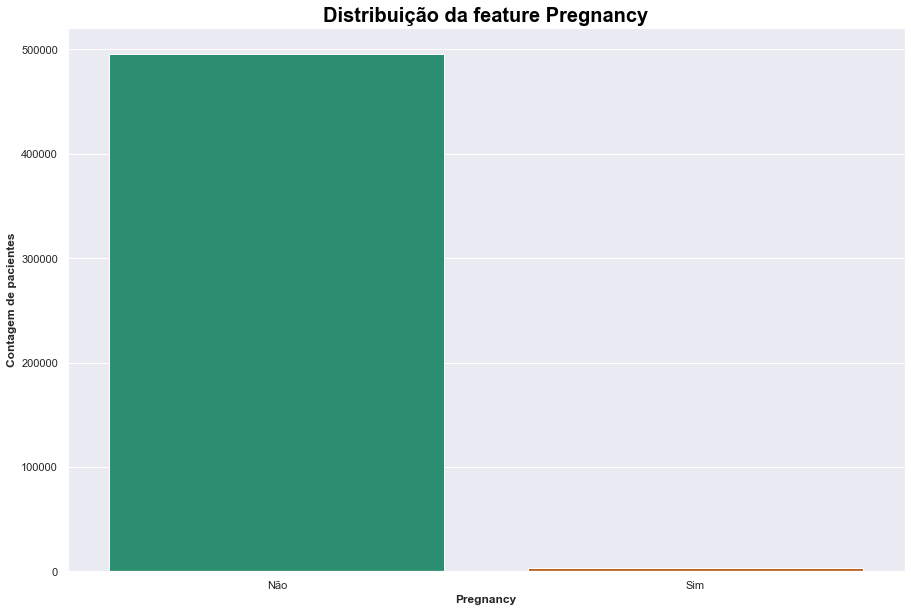

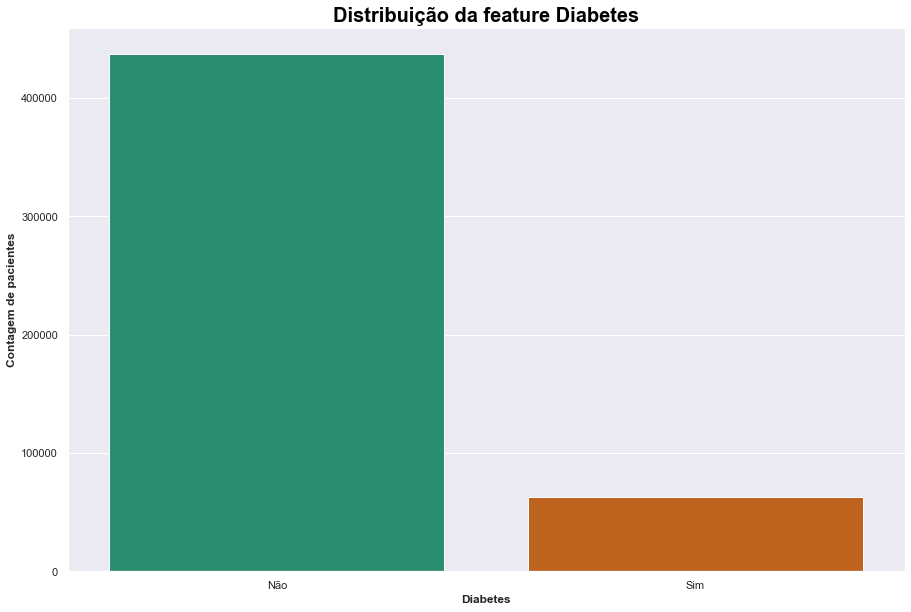

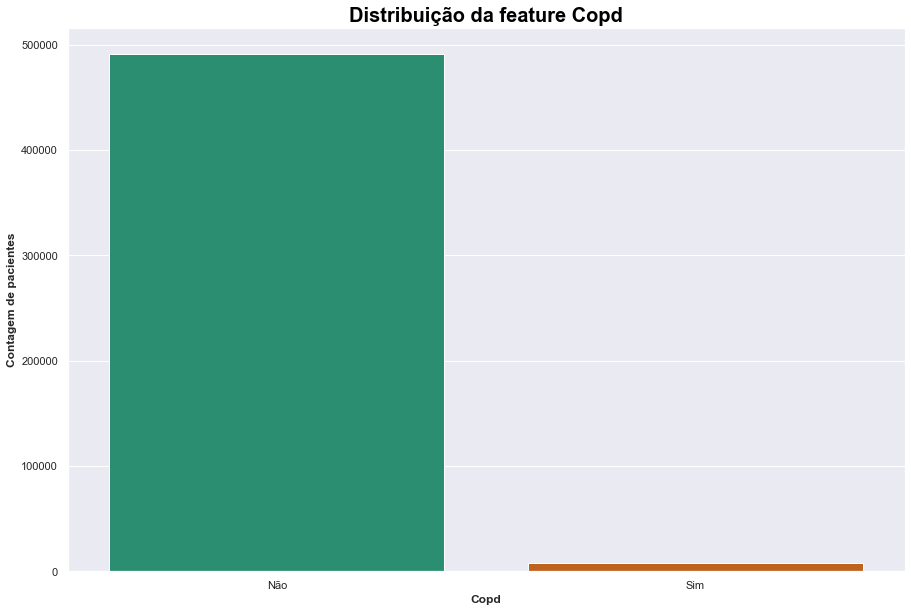

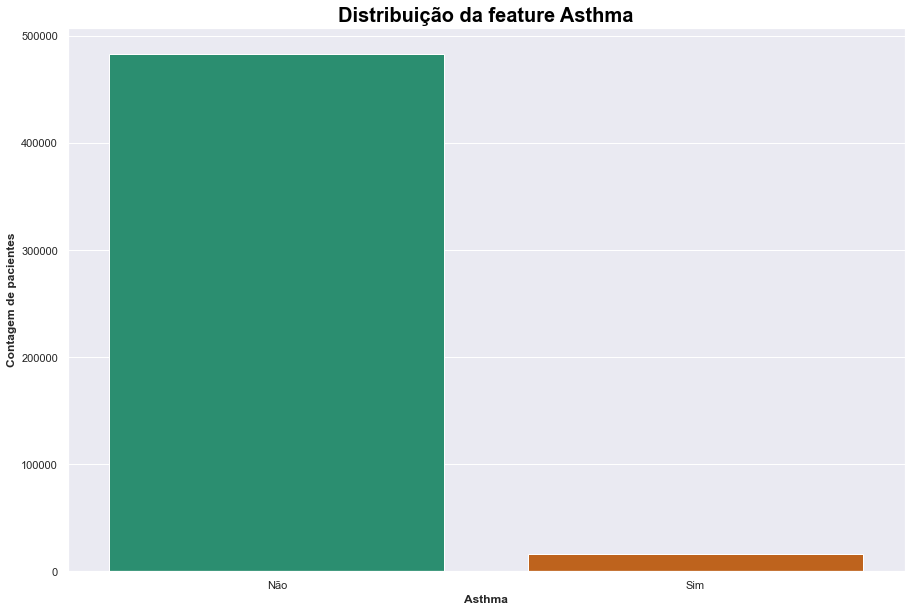

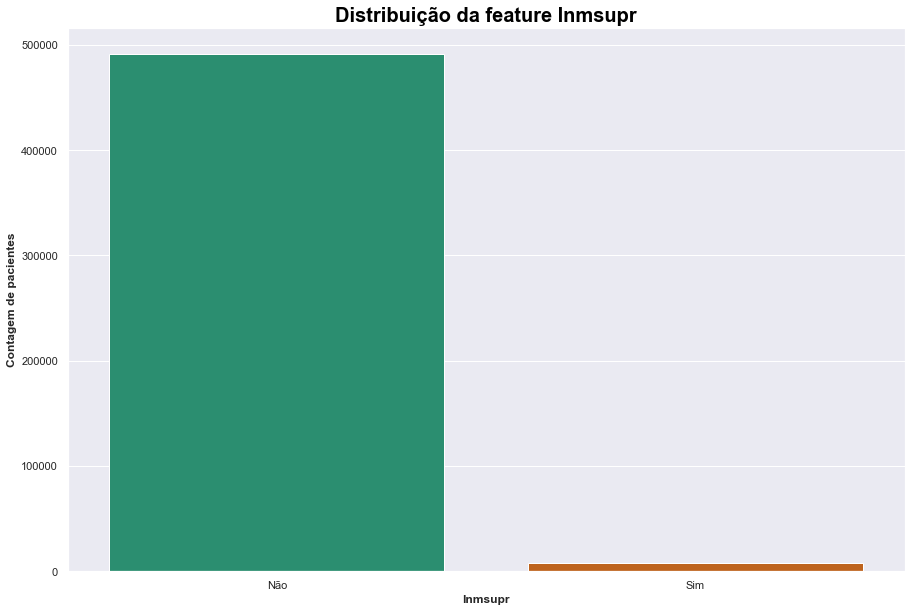

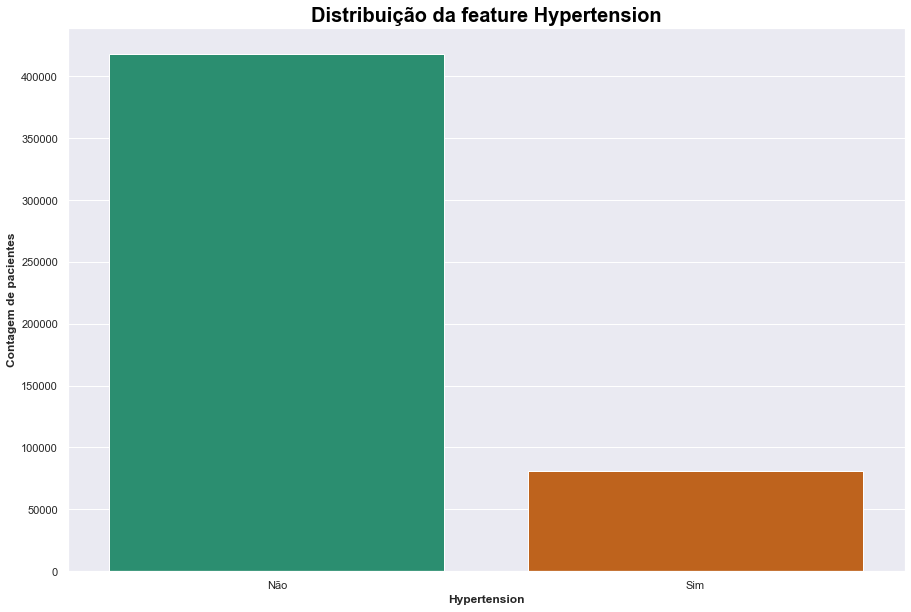

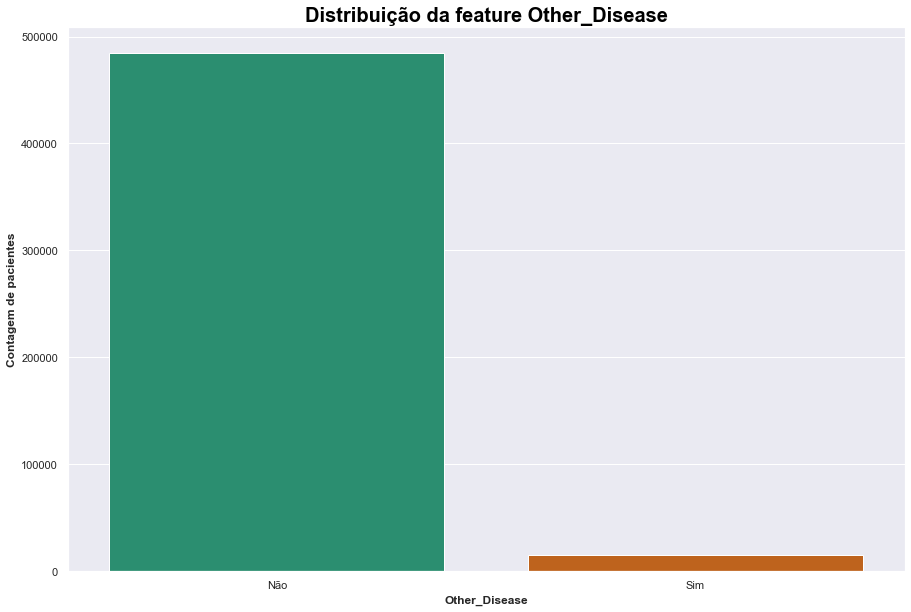

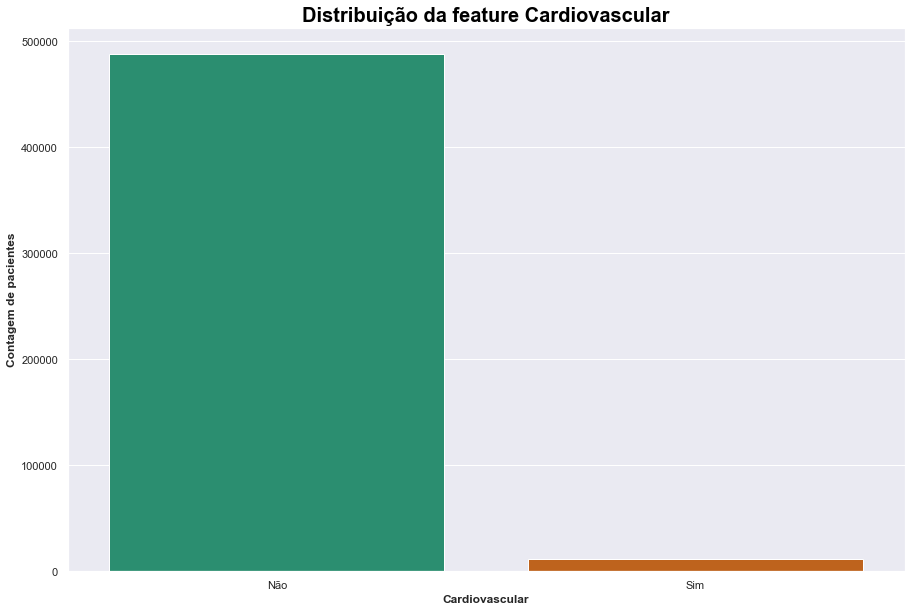

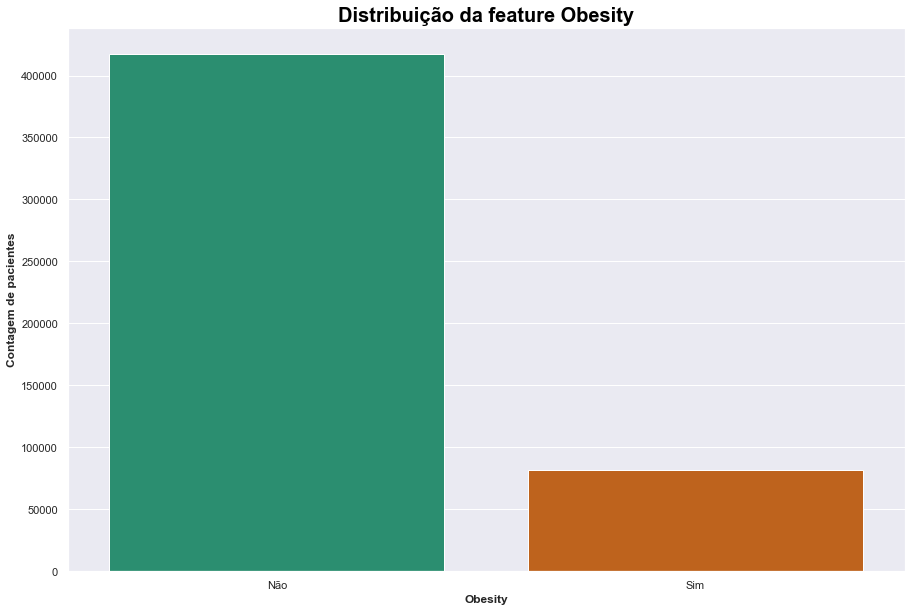

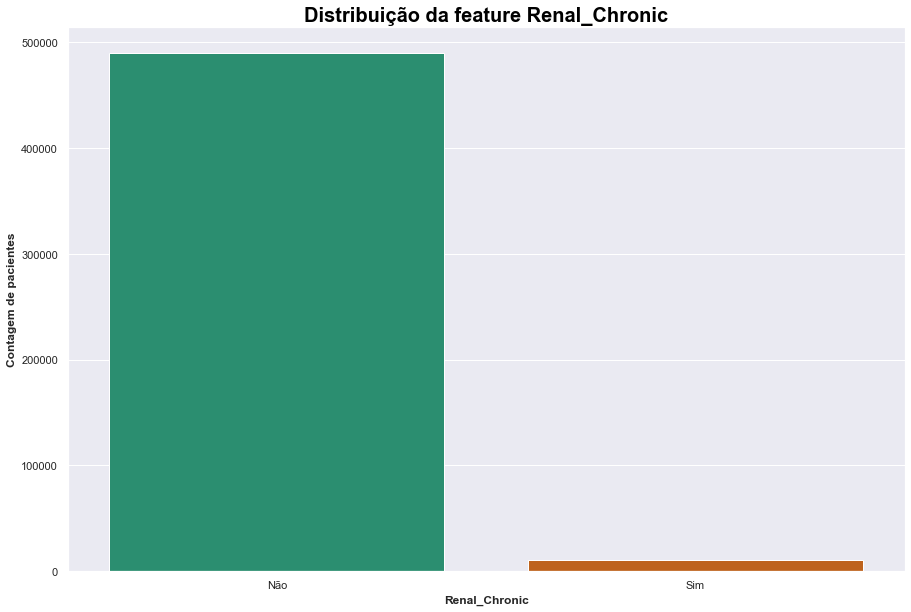

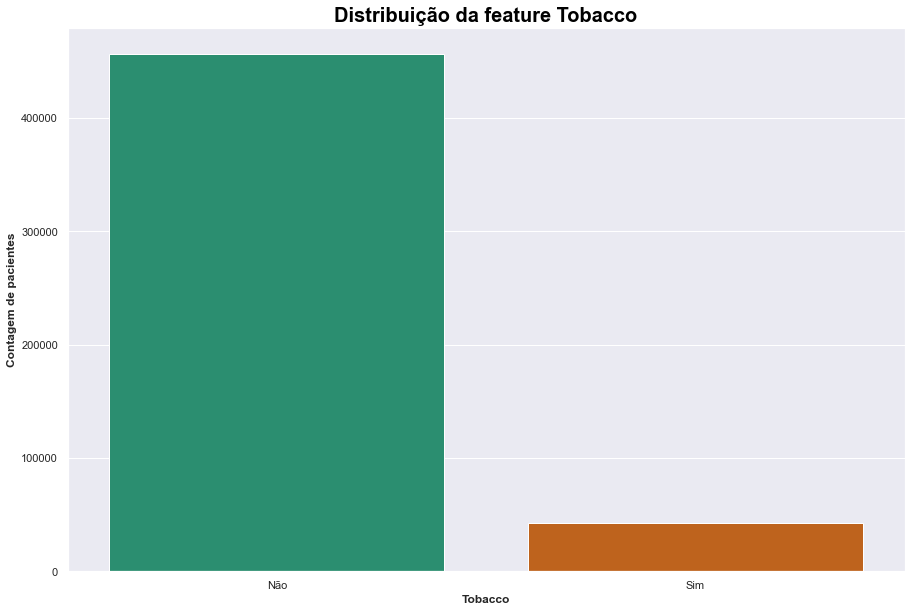

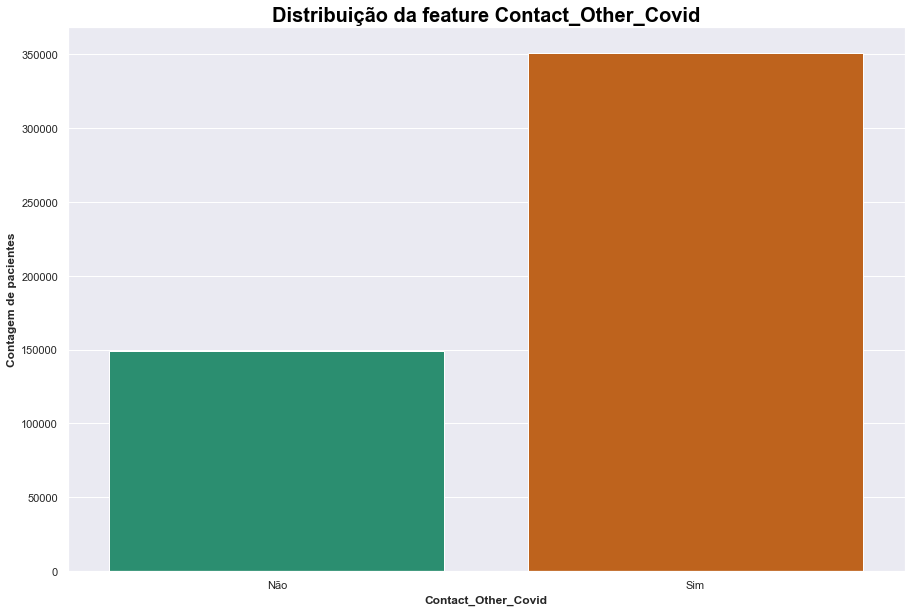

In [26]:
for col in df_tratado.columns[:-2]:
    if col == 'age':
        pass
    else:
        graph = sns.countplot(data=df_tratado,x=col,palette='Dark2')
        graph.set_title(f'Distribuição da feature {col.title()}')
        graph.set_xlabel(col.title())
        graph.set_ylabel('Contagem de pacientes')
        if col == "patient_type":
            graph.set_xticklabels(['Internado','Dispensado'])
        elif col == "sex":
            graph.set_xticklabels(['Homem','Mulher'])
        else:
            graph.set_xticklabels(['Não','Sim'])
    plt.show()



É perceptível que as colunas envolvendo comorbidades estão bastante desbalanceadas. Além disso também percebemos que a maioria das pessoas que fez o teste foi dispensada e alega ter tido contato com outra pessoa com covid, provavelmente por esse motivo ela fez o teste. Aqui já percebemos um possível problema, algumas das features podem ser posteriores ao resultado do teste, como por exemplo, internação na UTI ou não. Por enquanto não daremos muito foco nesse possível problema e analisaremos os dados que temos. Se isso realmente for relevante, na etapa de modelagem isso ficará mais evidente de qualquer forma.

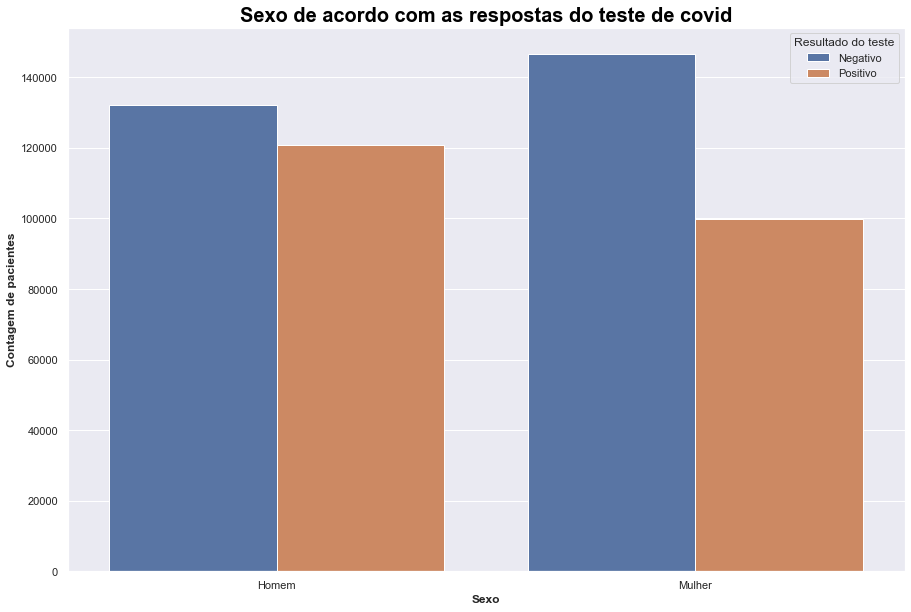

In [27]:
#Criando um countplot 
graph = sns.countplot(data=df_tratado,x='sex',hue='covid_res')
graph.set_title('Sexo de acordo com as respostas do teste de covid')
graph.set_xlabel('Sexo')
graph.set_ylabel('Contagem de pacientes')
graph.set_xticklabels(['Homem','Mulher'])
graph.legend(title='Resultado do teste',labels=['Negativo','Positivo']);

#Todos os gráficos que tiverem o hue "Resultado do teste" serão nesse padrão de azul e laranja

O volume de homens que deu positivo é maior proporcionalmente em relação ao volume de mulheres.

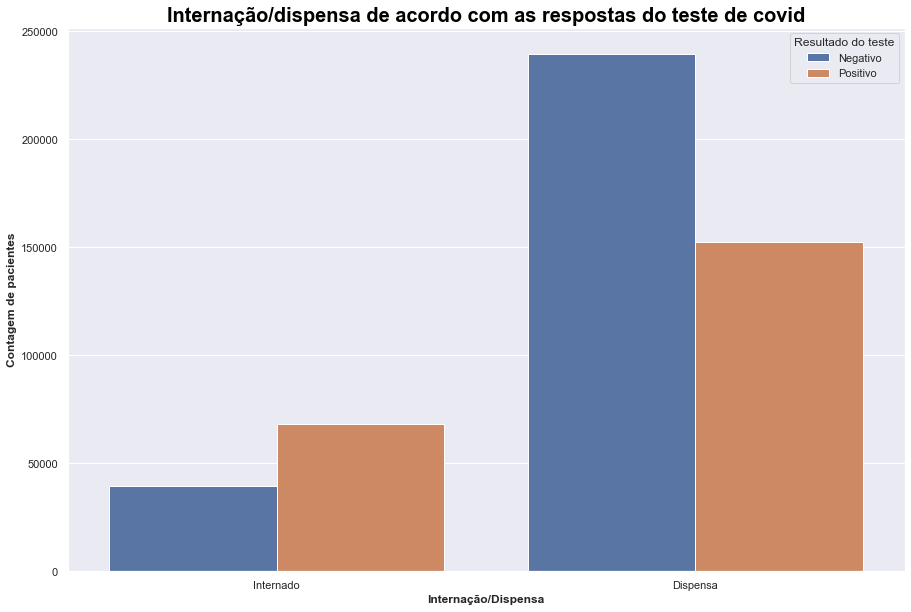

In [28]:
#Criando um countplot com o hue tipo de paciente
graph = sns.countplot(data=df_tratado,x='patient_type',hue='covid_res')
graph.set_title('Internação/dispensa de acordo com as respostas do teste de covid')
graph.set_xlabel('Internação/Dispensa')
graph.set_ylabel('Contagem de pacientes')
graph.set_xticklabels(['Internado','Dispensa'])
graph.legend(title='Resultado do teste',labels=['Negativo','Positivo']);

A maior parte das dispensas é negativa, o que faz total sentido e as dispensas positivas provavelmente são de pessoas com idades menores, iremos explorar esse gráfico também. O que não faz tanto sentido é o elevado volume de internações em que o teste deu negativo. Iremos explorar melhor essas internações negativas e entender o porque elas estão ocorrendo

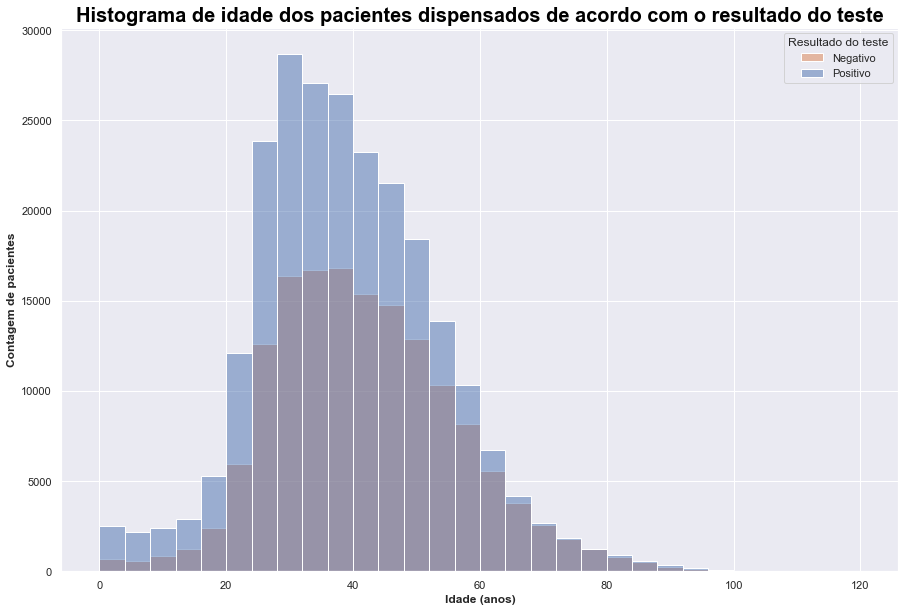

In [29]:
#Criando um filtro para pegarmos somente pacientes dispensados
filter = df_tratado['patient_type'] == 1

#Criando um histograma de idade dos pacientes dispensados
graph = sns.histplot(data=df_tratado.loc[filter,:],x='age',hue='covid_res',bins=30)
graph.set_title('Histograma de idade dos pacientes dispensados de acordo com o resultado do teste')
graph.set_xlabel('Idade (anos)')
graph.set_ylabel('Contagem de pacientes')
graph.legend(title='Resultado do teste',labels=['Negativo','Positivo'])

Como havíamos suposto a maioria dos pacientes dispensados que deram positivo tem idades entre 25 e 50 anos, estando fora do grupo de risco olhando somente para a idade. O número de possíveis comorbidades poderá ser usado futuramento como uma nova feature. As colunas que indicam algum tipo de comorbidade ou fator de risco são as seguintes:

- pneumonia
- diabetes
- asthma
- copd
- inmsupr
- hypertension
- ohter_disease
- cardiovascular
- renal_chronic
- tobacco

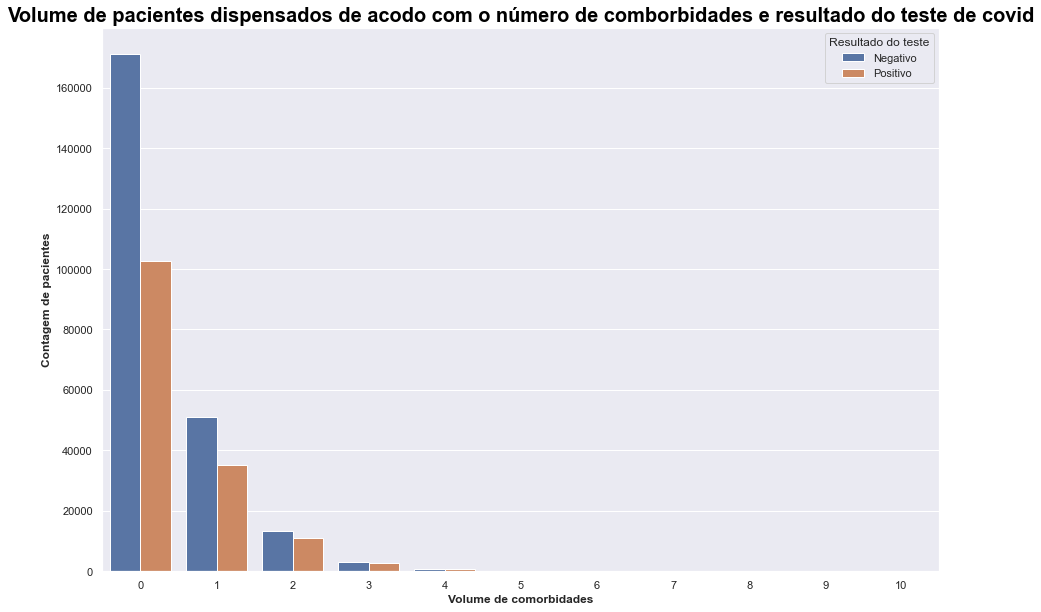

In [30]:
#Criando uma nova coluna para contar o número de comorbidades
df_tratado['comorbidades'] = df_tratado[['pneumonia',
                                         'diabetes',
                                         'asthma',
                                         'copd',
                                         'inmsupr',
                                         'hypertension',
                                         'other_disease',
                                         'cardiovascular',
                                         'renal_chronic',
                                         'tobacco']].gt(0).sum(axis=1)
#Criando um filtro para pegar somente os pacientes dispensados
filter = df_tratado['patient_type'] == 1

#Criando um count plot do número de comorbidades dos pacientes dispensados de acordo com o resultado do teste
graph = sns.countplot(data=df_tratado.loc[filter,:],x='comorbidades',hue='covid_res')
graph.set_title('Volume de pacientes dispensados de acodo com o número de comborbidades e resultado do teste de covid')
graph.set_xlabel('Volume de comorbidades')
graph.set_ylabel('Contagem de pacientes')
graph.legend(title='Resultado do teste',labels=['Negativo','Positivo']);


Dessa forma conseguimos confirmar nossa primeita hipotese, de que as pessoas dispensadas que o teste deu positivo além de novas, apresentavam nenhuma comorbidade na sua grande maioria, sendo consideradas pacientes com menos risco de falecimento e, dessa forma, não sendo necessária a internação

Vamos olhar agora para os pacientes que o exame deu negativo mas foram internados da mesma forma

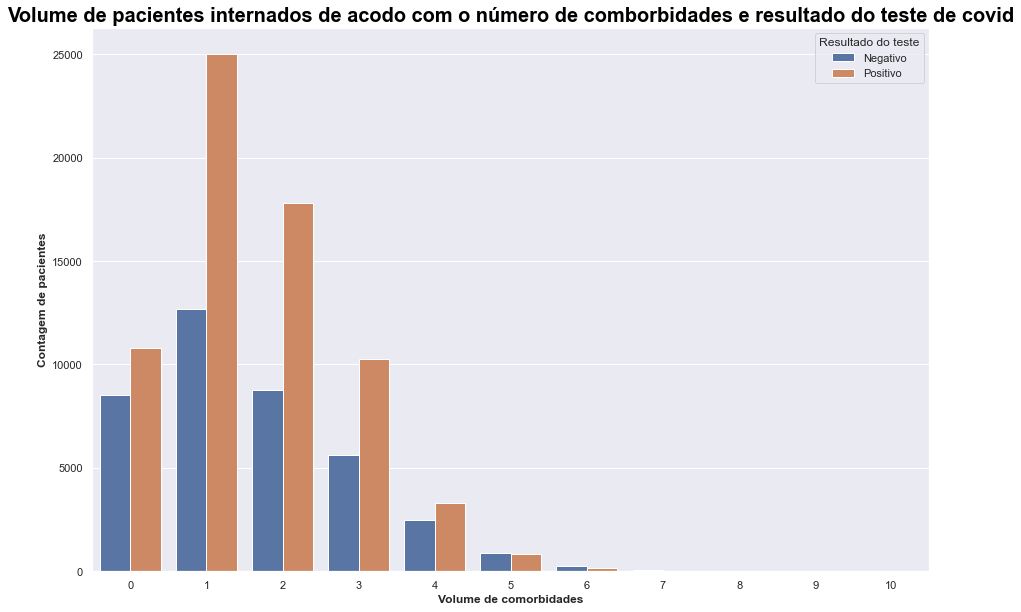

In [31]:
#Criando filtro para pacientes que foram internados
filter = df_tratado['patient_type'] == 0

#Criando um countplot do número de pacientes internados de acordo com as comorbidades e o resultado do teste
graph = sns.countplot(data=df_tratado.loc[filter,:],x='comorbidades',hue='covid_res')
graph.set_title('Volume de pacientes internados de acodo com o número de comborbidades e resultado do teste de covid')
graph.set_xlabel('Volume de comorbidades')
graph.set_ylabel('Contagem de pacientes')
graph.legend(title='Resultado do teste',labels=['Negativo','Positivo']);

Apesar do testes terem dado negativo, um elevado volume de pacientes tinha 1 ou mais comorbidades. O teste negativo e a internação pode indicar que os testes foram feitos no momento errado, dando falso positivo. 
É interessante notar que um elevado volume de pacientes internados tem 0 comorbidades, podendo ser pacientes com idade avançada.Para sanar essa dúvida vamos olhar para o histograma de idade dos pacientes internados e com zero comorbidades

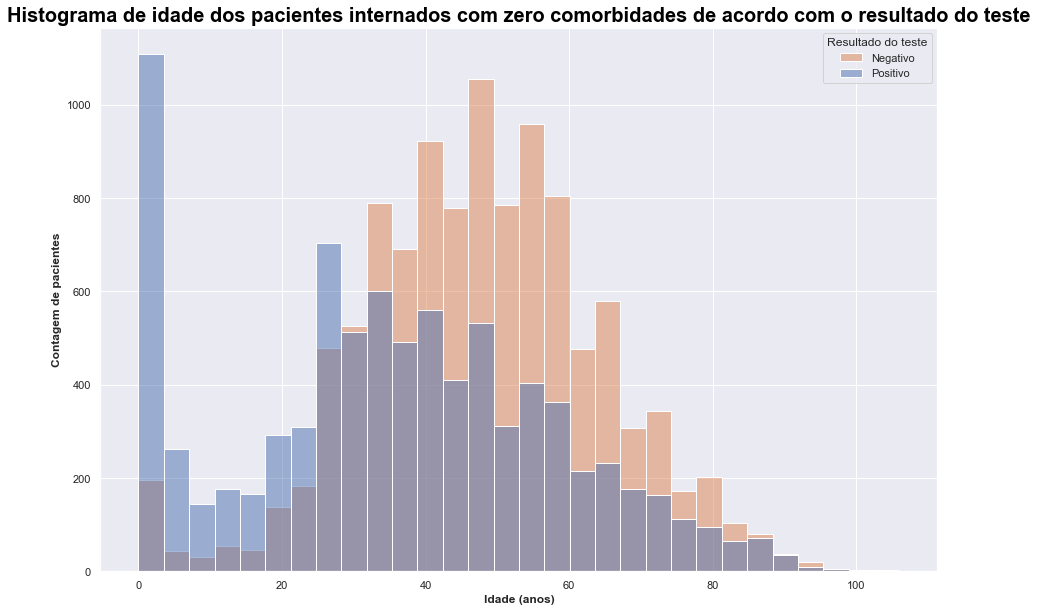

In [32]:
#Criando um filtro para pegarmos somente pacientes internados
filter = (df_tratado['patient_type'] == 0) & (df_tratado['comorbidades'] == 0)

#Criando um histograma de idade dos pacientes internados e com 0 comorbidades
graph = sns.histplot(data=df_tratado.loc[filter,:],x='age',hue='covid_res',bins=30)
graph.set_title('Histograma de idade dos pacientes internados com zero comorbidades de acordo com o resultado do teste')
graph.set_xlabel('Idade (anos)')
graph.set_ylabel('Contagem de pacientes')
graph.legend(title='Resultado do teste',labels=['Negativo','Positivo']);

Pelo gráfico vemos que nossa hipótese da idade dos pacientes com zero comorbidades e internados ser alta foi refutada. Acontece justamente o contrario, temos um elevado volume de pacientes muito novos, provavelmente crianças pequenas ou bebês. Isso fica mais evidênte ainda olhando para o histograma de quem de fato testou positivo

Vamos olhar dos pacientes internados, quantos foram para a uti

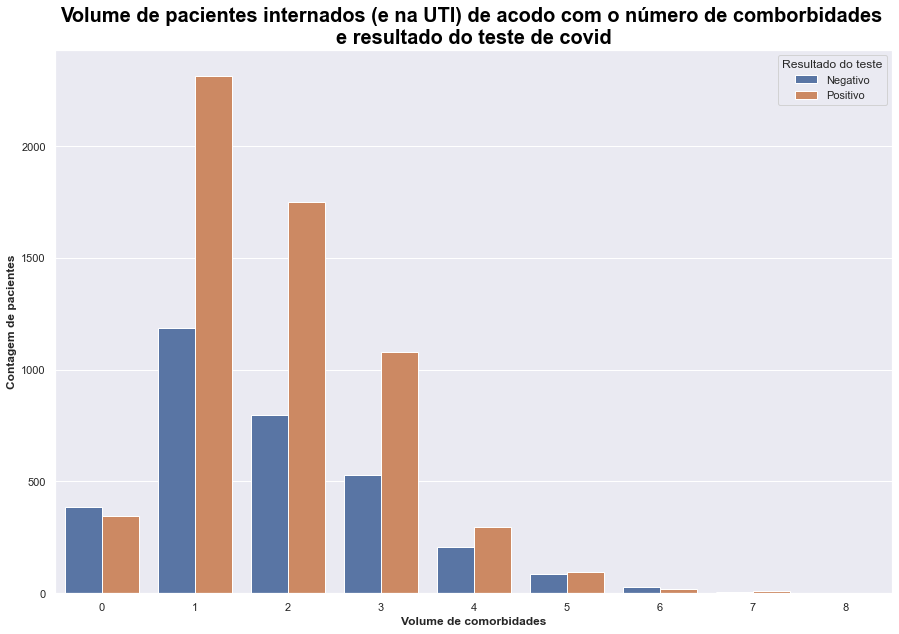

In [33]:
#Filtro para pegar pacientes internados e na uti
filter = (df_tratado['patient_type'] == 0) & (df_tratado['icu'] == 1)

graph = sns.countplot(data=df_tratado.loc[filter,:],x='comorbidades',hue='covid_res')
graph.set_title('Volume de pacientes internados (e na UTI) de acodo com o número de comborbidades \ne resultado do teste de covid')
graph.set_xlabel('Volume de comorbidades')
graph.set_ylabel('Contagem de pacientes')
graph.legend(title='Resultado do teste',labels=['Negativo','Positivo'],loc='upper right');

O volume de pacientes com 0 comorbidades reduziu drasticamente, de 10 mil para menos de 500. Indicando que somente pacientes com quadros mais graves são internados e vão para UTI e que esses quadros mais graves ocorrem pouco em pessoas com zero comorbidades. Vamos olhar agora os pacientes que são internados mas não vão para UTI.

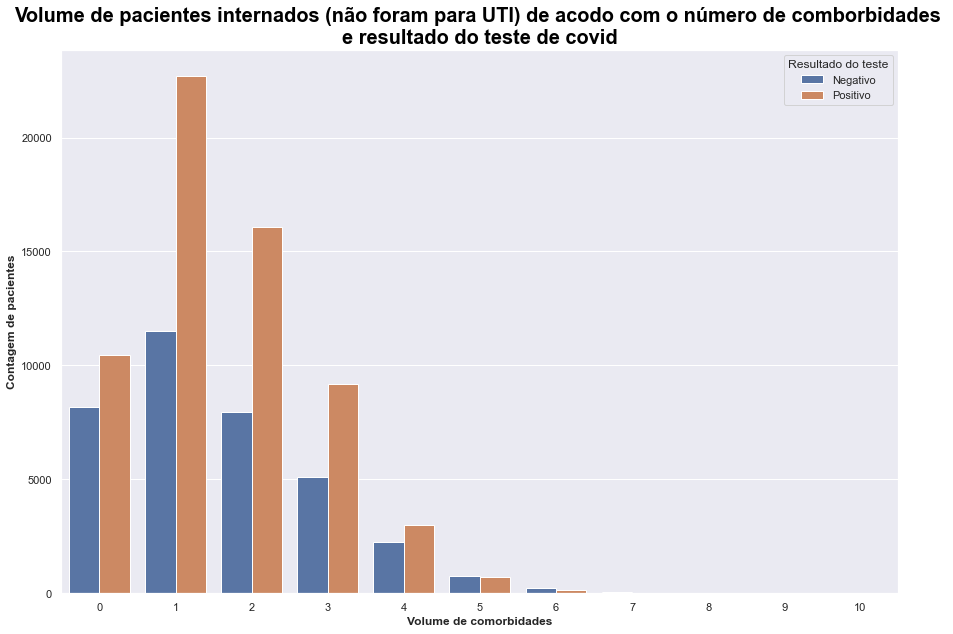

In [34]:
#Filtro para pegar pacientes internados e não foram para a  uti
filter = (df_tratado['patient_type'] == 0) & (df_tratado['icu'] == 0)

graph = sns.countplot(data=df_tratado.loc[filter,:],x='comorbidades',hue='covid_res')
graph.set_title('Volume de pacientes internados (não foram para UTI) de acodo com o número de comborbidades \ne resultado do teste de covid')
graph.set_xlabel('Volume de comorbidades')
graph.set_ylabel('Contagem de pacientes')
graph.legend(title='Resultado do teste',labels=['Negativo','Positivo'],loc='upper right');

Dessa forma, constatamos que a maior parte dos pacientes internados tem comorbidades e desses apenas uma pequena parte vai para a UTI.

Vamos olhar agora como cada comorbidade se relacionada com as internações.

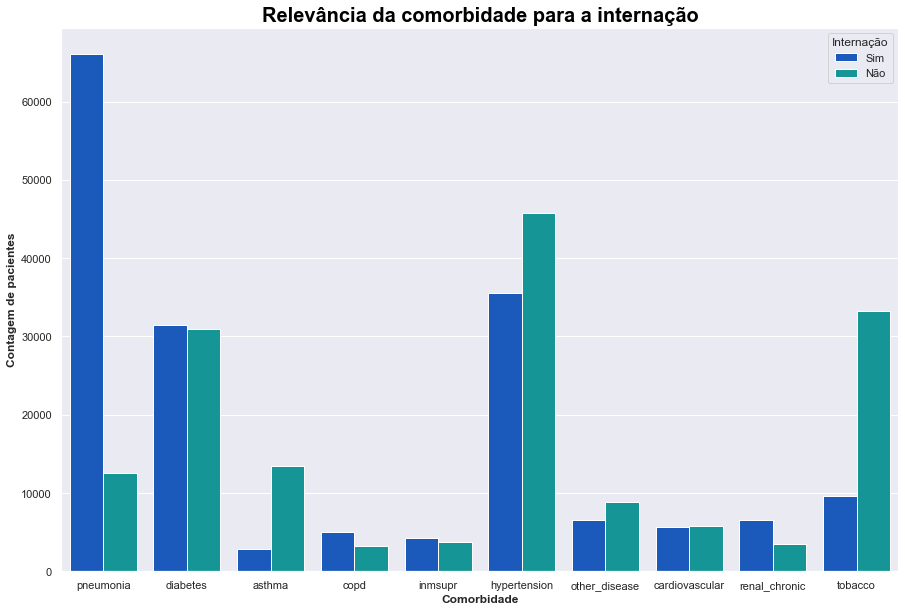

In [35]:
#Criando uma lista com as comorbidades para usar de colunas no melt que será feito abaixo
comorbidades = ['pneumonia',
                'diabetes',
                'asthma',
                'copd',
                'inmsupr',
                'hypertension',
                'other_disease',
                'cardiovascular',
                'renal_chronic',
                'tobacco']

#Fazendo um melt do dataframe criaremos um novo dataframe com as colunas 
# 1) resultado do teste, 
# 2,3,4,5,6) as colunas ['covid_res','patient_type','intubed','sex','icu'],
# 7) uma coluna com o nome da comorbidade
# 8) e uma terceia coluna com a ausência ou presença da comorbidade
df_comorbidades = pd.melt(
                            frame= df_tratado,
                            id_vars= ['covid_res','patient_type','intubed','sex','icu','pregnancy'],
                            value_vars=comorbidades,
                            var_name='comorbidades',
                            value_name='comorbidade_sim'
                        )
#Filtro para pegar somente as linhas que tem comorbidade
filter_comorbidade = df_comorbidades['comorbidade_sim'] == 1.0


graph = sns.countplot(data=df_comorbidades.loc[filter_comorbidade,:],x='comorbidades',hue='patient_type',palette='winter')
graph.set_title('Relevância da comorbidade para a internação')
graph.set_xlabel('Comorbidade')
graph.set_ylabel('Contagem de pacientes')
graph.legend(title='Internação',labels=['Sim','Não'],loc='upper right');

#tudo que envolver internação usaemos esse padrão "winter"


Asma e tabaco apesar de pelo senso comum parecerem comorbidades que geram internação pode ser percebido que na verdade geram mais dispensas.
Pneumonia, hipertensão e diabetes geram um volume elevado de internações

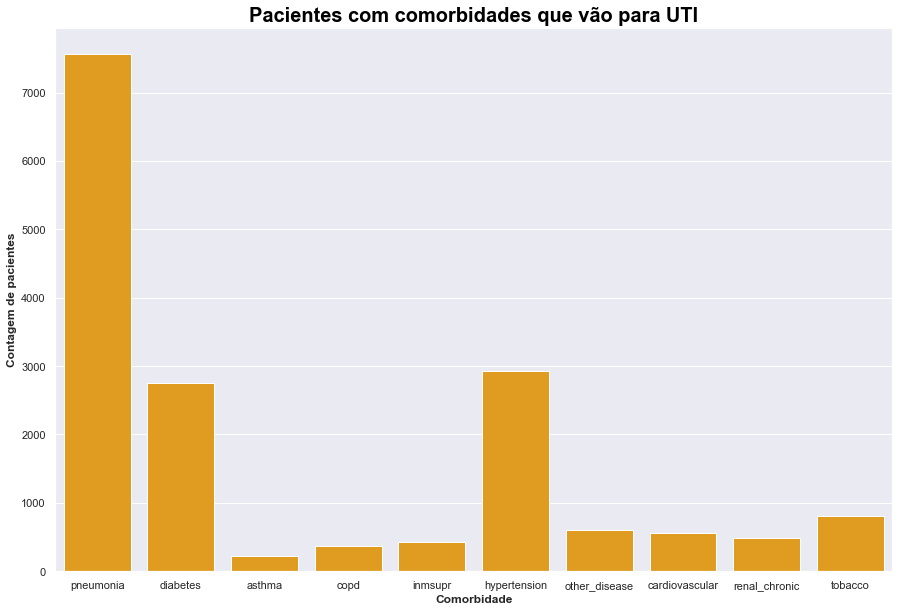

In [36]:
#Filtro para pacientes com comorbidade e que foram para a uti
filter_uti = (df_comorbidades['comorbidade_sim'] == 1.0) & (df_comorbidades['icu'] == 1.0) 


graph = sns.countplot(data=df_comorbidades.loc[filter_uti,:],x='comorbidades',color='Orange')
graph.set_title('Pacientes com comorbidades que vão para UTI')
graph.set_xlabel('Comorbidade')
graph.set_ylabel('Contagem de pacientes');

#tudo que envolver uti usaremos o padrão alaranjado

Por esse gráfico é possível perceber que as comorbidades que mais geram internações também são as que mais levem a casos de UTI. No entanto o volume de pacientes que vão para uti é 10% das internações

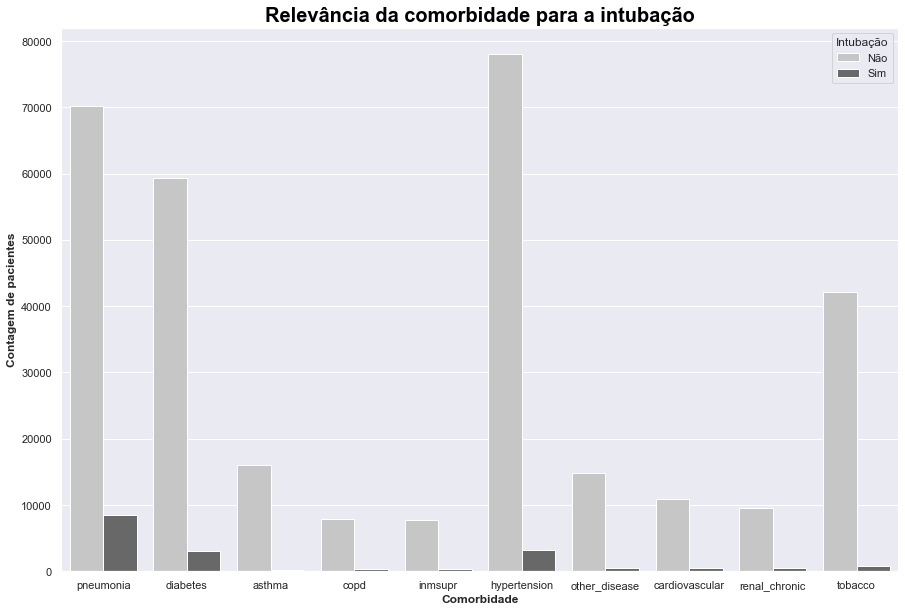

In [37]:
#Criando um gráfico para ver a relevância da comorbidade para a entubação
graph = sns.countplot(data=df_comorbidades.loc[filter_comorbidade,:],x='comorbidades',hue='intubed',palette='Greys')
graph.set_title('Relevância da comorbidade para a intubação')
graph.set_xlabel('Comorbidade')
graph.set_ylabel('Contagem de pacientes')
graph.legend(title='Intubação',labels=['Não','Sim'],loc='upper right');

#tudo que envolver intubação usaremos o padrão cinza

O mesmo padrão da relevância para a internação na uti é seguido aqui. Além disso fica evidente que mesmo nas pessoas com comorbidade a intubação é um caso extremo

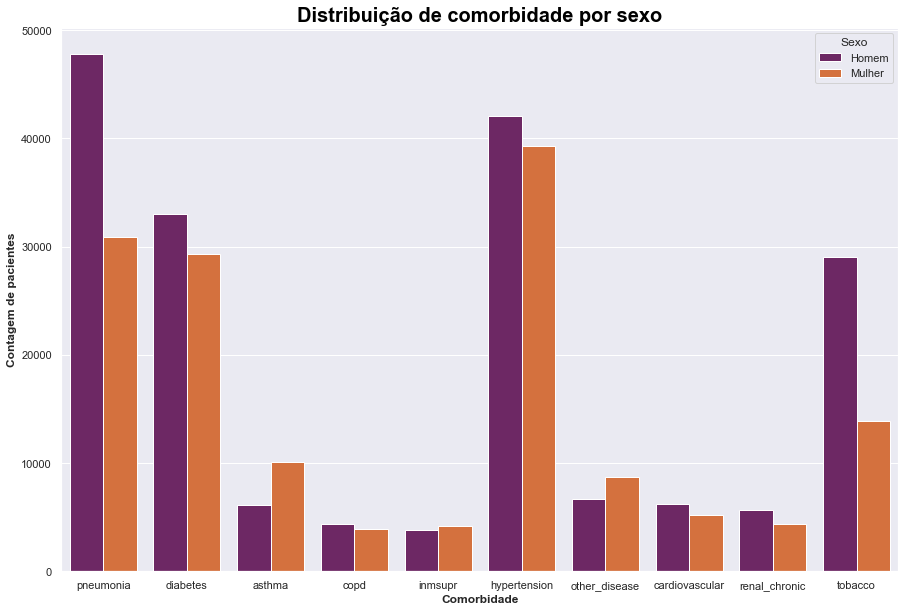

In [38]:
filter_comorbidade = df_comorbidades['comorbidade_sim'] == 1.0

graph = sns.countplot(data=df_comorbidades.loc[filter_comorbidade,:],x='comorbidades',hue='sex',palette='inferno')
graph.set_title('Distribuição de comorbidade por sexo')
graph.set_xlabel('Comorbidade')
graph.set_ylabel('Contagem de pacientes')
graph.legend(title='Sexo',labels=['Homem','Mulher'],loc='upper right');


#tudo que envolver sexo usaremos esse padrão "inferno"

Assumindo que o dataset represente a população, pneumonia e tabacado parecem ser comorbidades mais frequentes em homens. Além disso as comorbidades mais frequentes foram peneumonia, diabetes, hipertensão e tabaco. Considerando que grande parte da população fuma e/ou tem problemas de sobrepeso (que pode acasionar diabetes e hipertensão), essa distribuição está dentro do esperado. A peneumonia é um dos sintomas da covid, então também era esperado um elevado volume de pessoas com esse sintoma

Vamos olhar para a fatia dados dados que envolve a gravidez

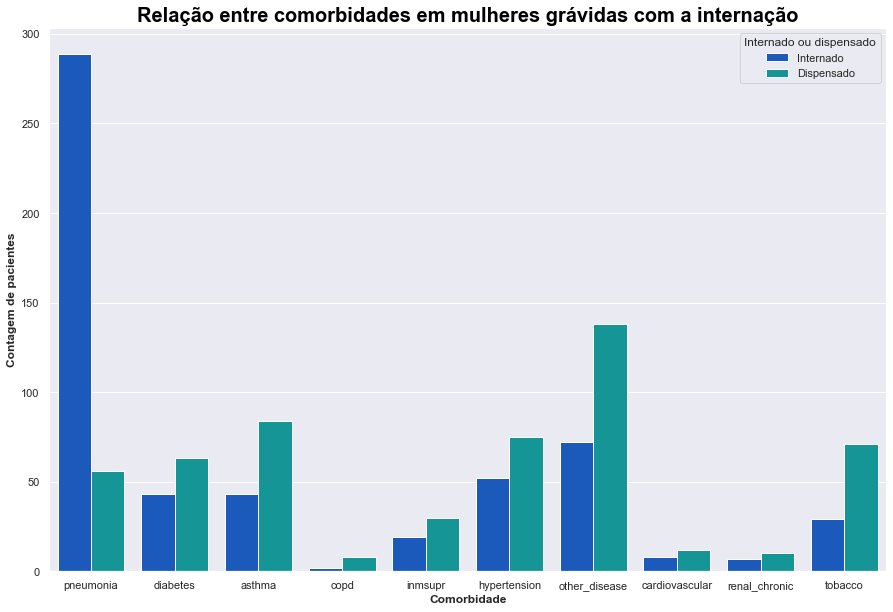

In [39]:
#Criando filtro para comorbidade e gravidez 
filter_gravida_comorbidade = (df_comorbidades['comorbidade_sim'] == 1.0) & (df_comorbidades['pregnancy'] == 1.0)

graph = sns.countplot(data=df_comorbidades.loc[filter_gravida_comorbidade,:],x='comorbidades',hue='patient_type',palette='winter')
graph.set_title('Relação entre comorbidades em mulheres grávidas com a internação')
graph.set_xlabel('Comorbidade')
graph.set_ylabel('Contagem de pacientes')
graph.legend(title='Internado ou dispensado',labels=['Internado','Dispensado'],loc='upper right');

Aqui a hipertenção e a diabetes não são mais tão relevantes e a peneumonia se torna extremamente relevante. Entretanto o volume de pacientes mulheres grávidas com comorbidades é bem pequeno

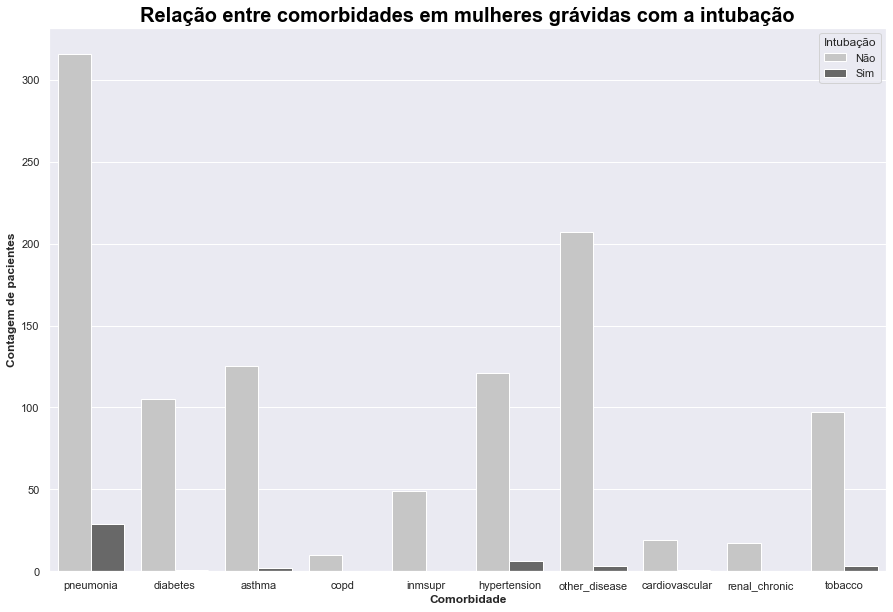

In [40]:
filter_gravida_comorbidade = (df_comorbidades['comorbidade_sim'] == 1.0) & (df_comorbidades['pregnancy'] == 1.0)

graph = sns.countplot(data=df_comorbidades.loc[filter_gravida_comorbidade,:],x='comorbidades',hue='intubed',palette='Greys')
graph.set_title('Relação entre comorbidades em mulheres grávidas com a intubação')
graph.set_xlabel('Comorbidade')
graph.set_ylabel('Contagem de pacientes')
graph.legend(title='Intubação',labels=['Não','Sim'],loc='upper right');

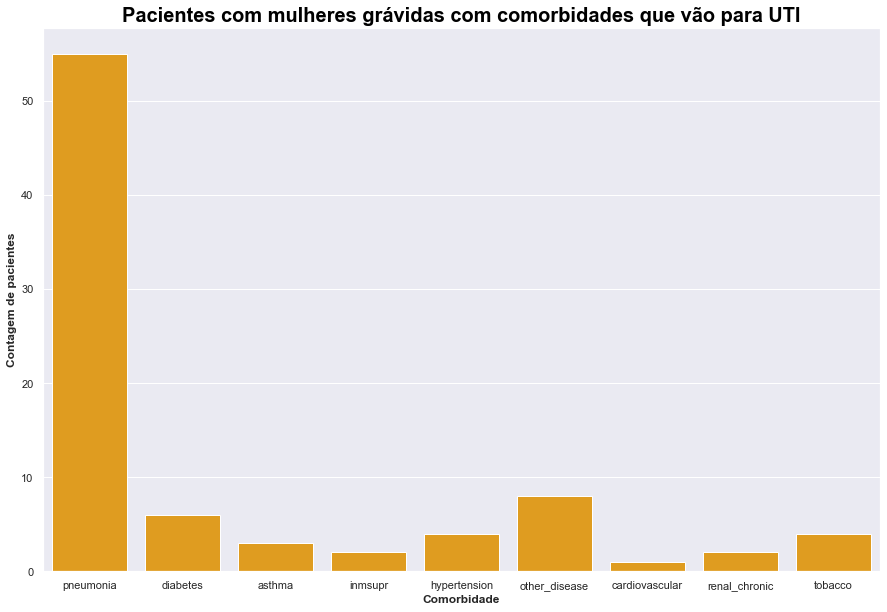

In [41]:
#Filtro para pacientes com comorbidade, grávidas e que foram para a UTI
filter_gravida_comorbidade_uti = (df_comorbidades['comorbidade_sim'] == 1.0) & (df_comorbidades['pregnancy'] == 1.0) & (df_comorbidades['icu'] == 1.0)

graph = sns.countplot(data=df_comorbidades.loc[filter_gravida_comorbidade_uti,:],x='comorbidades',color='Orange')
graph.set_title('Pacientes com mulheres grávidas com comorbidades que vão para UTI')
graph.set_xlabel('Comorbidade')
graph.set_ylabel('Contagem de pacientes');

Vamos olhar para o grupo de mulheres grávidas em relação a teste positivo ou não, internação, intubação e uti

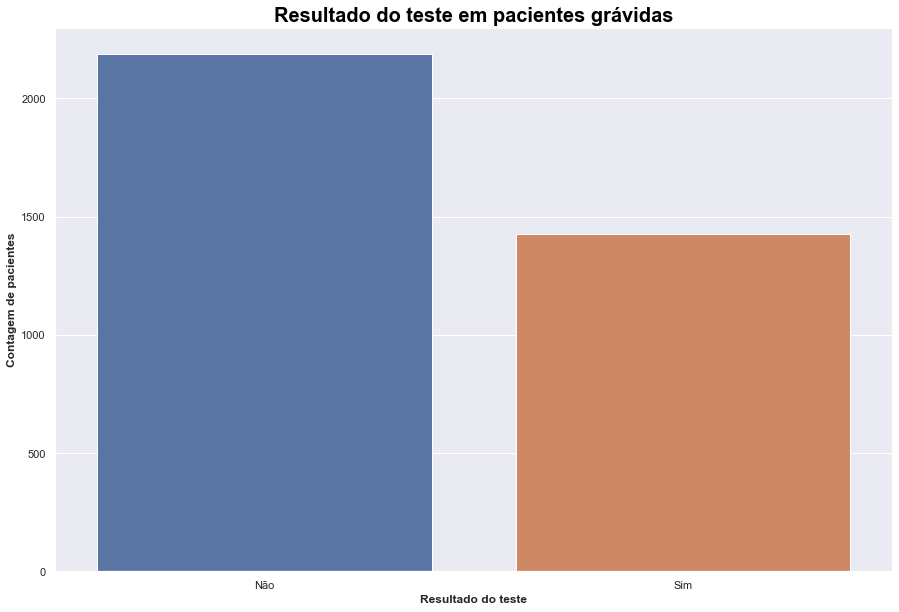

In [42]:
filter = df_tratado['pregnancy'] == 1

graph = sns.countplot(data=df_tratado.loc[filter,:],x='covid_res')
graph.set_title('Resultado do teste em pacientes grávidas')
graph.set_xlabel('Resultado do teste')
graph.set_ylabel('Contagem de pacientes')
graph.set_xticklabels(['Não','Sim']);


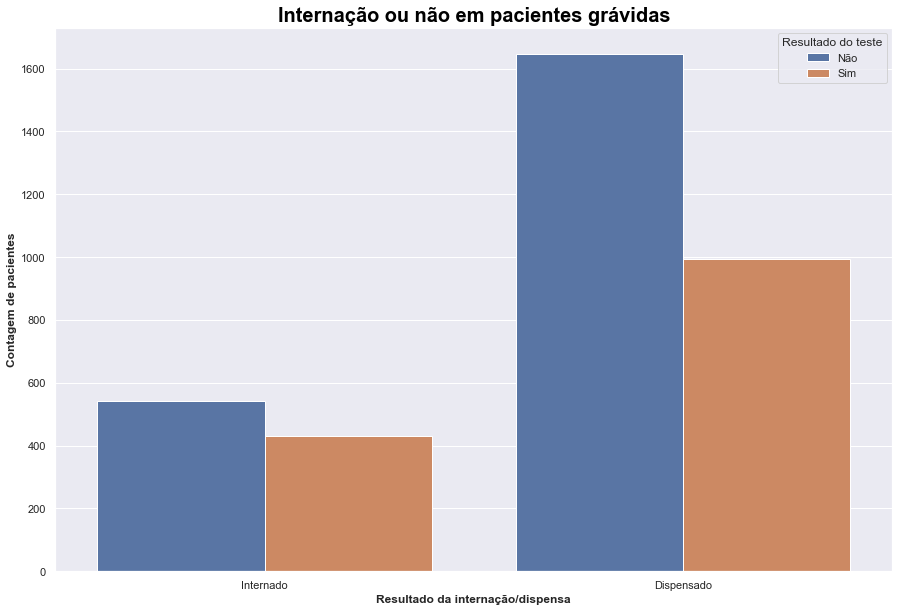

In [43]:
filter = df_tratado['pregnancy'] == 1

graph = sns.countplot(data=df_tratado.loc[filter,:],x='patient_type',hue='covid_res')
graph.set_title('Internação ou não em pacientes grávidas')
graph.set_xlabel('Resultado da internação/dispensa')
graph.set_ylabel('Contagem de pacientes')
graph.set_xticklabels(['Internado','Dispensado'])
graph.legend(title='Resultado do teste',labels=['Não','Sim'],loc='upper right');

O volume de mulheres grávidas que foram dispensadas mesmo com teste positivo é expressivo. Fazendo uma rápida pesquisa, em pessoas grávidas a presença de pneumonia ou outras doenças constitui fator de risco. Dessa forma vamos analisar um gráfico desse tópico

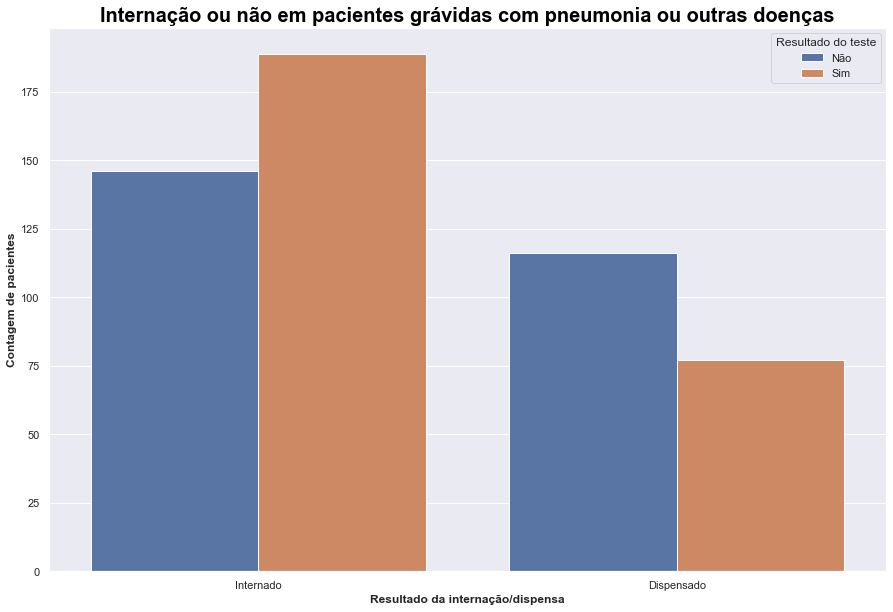

In [44]:
#Filtro para mulher grávidas e com pneumonia ou outra doença
filter = (df_tratado['pregnancy'] == 1) & ((df_tratado['pneumonia']== 1) | (df_tratado['other_disease']== 1))

graph = sns.countplot(data=df_tratado.loc[filter,:],x='patient_type',hue='covid_res')
graph.set_title('Internação ou não em pacientes grávidas com pneumonia ou outras doenças')
graph.set_xlabel('Resultado da internação/dispensa')
graph.set_ylabel('Contagem de pacientes')
graph.set_xticklabels(['Internado','Dispensado'])
graph.legend(title='Resultado do teste',labels=['Não','Sim'],loc='upper right');

Nossa teoria se confirmou, a maior parte das pacientes gravidas dispensadas e com resultado positivo não tinha pneumonia ou outras doenças. Essas pacientes que não foram internadas mesmo com o resultado positivo pode ser fruto de uma série de motivos como: superlotação do hospital, paciente não querer a internação, paciente não precisar de internação mesmo apresentado os fatores de risco, dentre outros

Das pacientes grávidas vamos olhar também quantas delas vão para uti

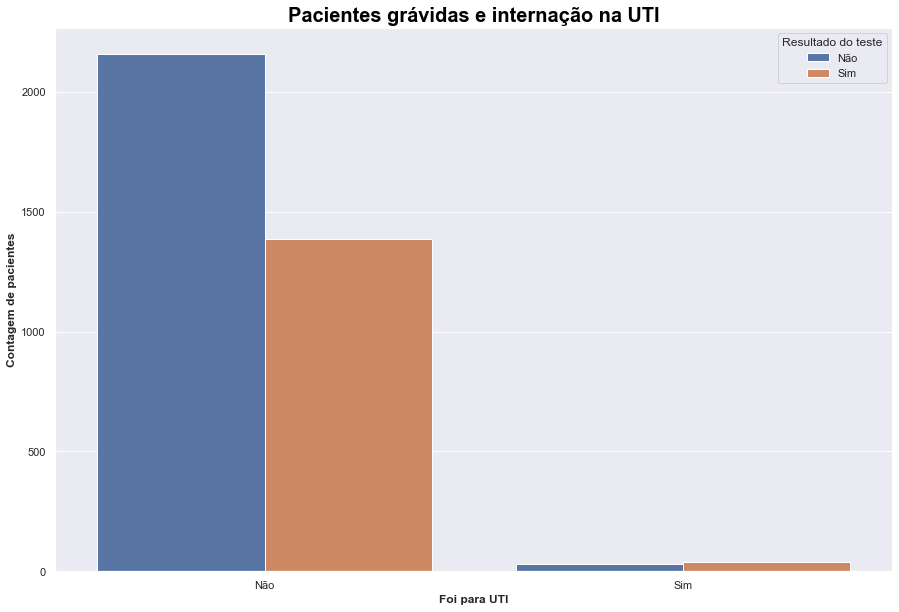

In [45]:
filter = df_tratado['pregnancy'] == 1

graph = sns.countplot(data=df_tratado.loc[filter,:],x='icu',hue='covid_res')
graph.set_title('Pacientes grávidas e internação na UTI')
graph.set_xlabel('Foi para UTI')
graph.set_ylabel('Contagem de pacientes')
graph.set_xticklabels(['Não','Sim'])
graph.legend(title='Resultado do teste',labels=['Não','Sim'],loc='upper right');

Novamente vemos que a internação na UTI é um caso extremo e o volume de pacientes grávidas interndas é baixo. Olhando para a intubação, esperamos encontrar o mesmo comportamento

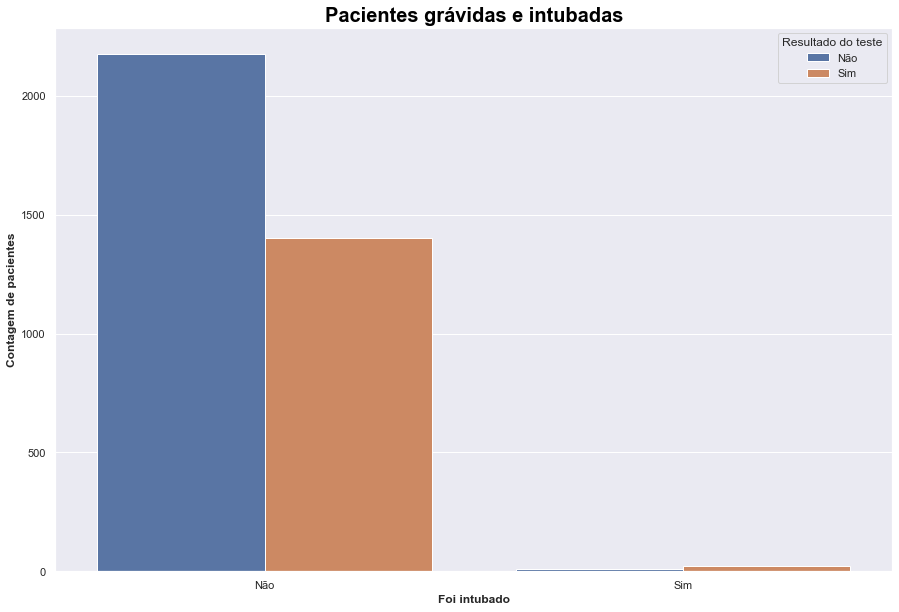

In [46]:
filter = df_tratado['pregnancy'] == 1

graph = sns.countplot(data=df_tratado.loc[filter,:],x='intubed',hue='covid_res')
graph.set_title('Pacientes grávidas e intubadas')
graph.set_xlabel('Foi intubado')
graph.set_ylabel('Contagem de pacientes')
graph.set_xticklabels(['Não','Sim'])
graph.legend(title='Resultado do teste',labels=['Não','Sim'],loc='upper right');

Vamos olhar o grafico da target com cada uma das features como hue

In [47]:
#Criando um dicionário para cada coluna ter sua cor quando for usar ela de hue

pallet = sns.color_palette("flare",n_colors = 20).as_hex()


colors = {  'sex'           : 'inferno',
            'patient_type'  : 'winter',
            'intubed'       : 'Greys',
            'pneumonia'     : pallet[0],
            'age'           : pallet[1],
            'pregnancy'     : pallet[2],
            'diabetes'      : pallet[3],
            'copd'          : pallet[4],
            'asthma'        : pallet[5],
            'inmsupr'       : pallet[6],
            'hypertension'  : pallet[7],
            'other_disease' : pallet[8],
            'cardiovascular': pallet[9],
            'obesity'       : pallet[10],
            'renal_chronic' : pallet[11],
            'tobacco'       : pallet[12],
            'contact_other_covid'  :pallet[13],
            'icu'           : 'Oranges',
        }

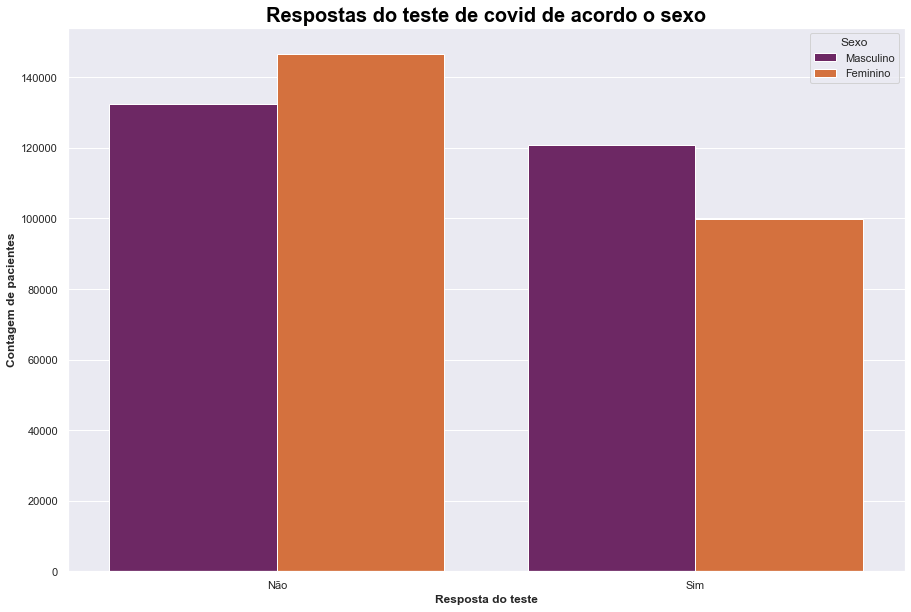

In [48]:
#Criando um countplot 
graph = sns.countplot(data=df_tratado,x='covid_res',hue='sex',palette=colors['sex'])
graph.set_title('Respostas do teste de covid de acordo o sexo')
graph.set_xlabel('Resposta do teste')
graph.set_ylabel('Contagem de pacientes')
graph.set_xticklabels(['Não','Sim'])
graph.legend(title='Sexo',labels=['Masculino','Feminino']);

O volume de homens que testaram negativo é menor do que o de mulheres que testaram negativo. Quando o resultado é positivo esse quadro se inverte. Considerando que a proporção global de homens e mulheres está equilibrada isso pode indicar que os homens tomaram menos medidas de isolamento. Vamos analisar a variável contato com outras pessoas contaminadas e ver como essas duas variáveis estão relacionadas

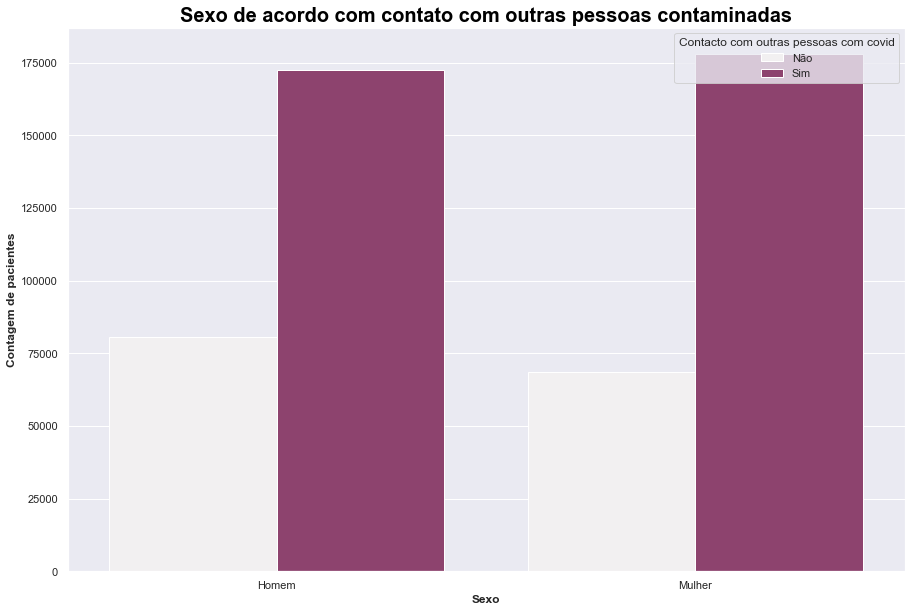

In [49]:
graph = sns.countplot(data=df_tratado,x='sex',hue='contact_other_covid',color=colors['contact_other_covid'])
graph.set_title('Sexo de acordo com contato com outras pessoas contaminadas')
graph.set_xlabel('Sexo')
graph.set_ylabel('Contagem de pacientes')
graph.set_xticklabels(['Homem','Mulher'])
graph.legend(title='Contacto com outras pessoas com covid',labels=['Não','Sim'],loc='best');

Essa possível hipotese se mostrou false já que tanto homens como mulheres declararam em proporções próximas que tiverem contato com outras pessoas contaminadas. O fato de menos homens terem dado negativo em relação a mulheres pode ter diversas causas que só com os dados que temos, não conseguiremos explicar

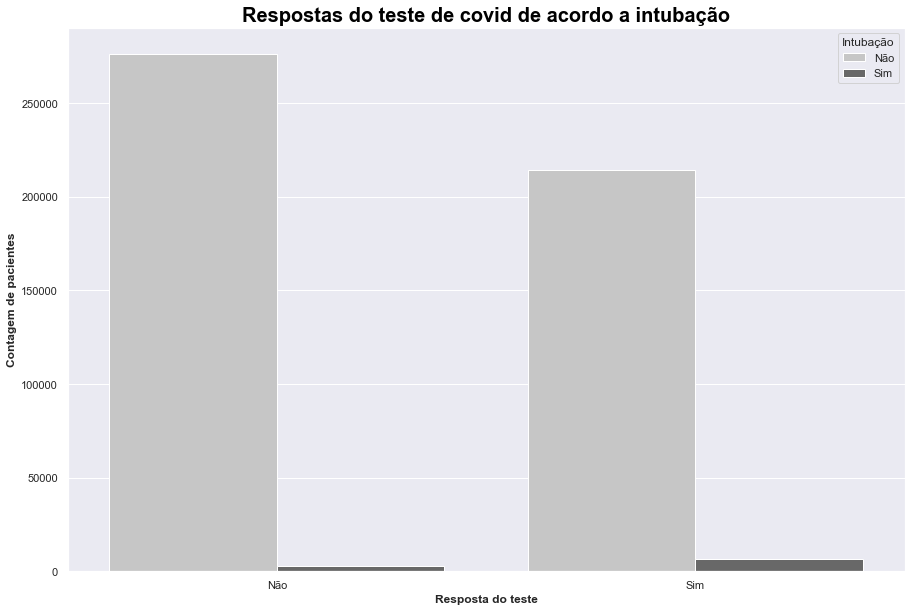

In [50]:
#Criando um countplot 
graph = sns.countplot(data=df_tratado,x='covid_res',hue='intubed',palette=colors['intubed'])
graph.set_title('Respostas do teste de covid de acordo a intubação')
graph.set_xlabel('Resposta do teste')
graph.set_ylabel('Contagem de pacientes')
graph.set_xticklabels(['Não','Sim'])
graph.legend(title='Intubação',labels=['Não','Sim']);

O gráfico só confirma que intubação realmente é um caso extremo e a grande maioria das pessoas que testaram positivo não estavam em condições extremas que exigissem internção

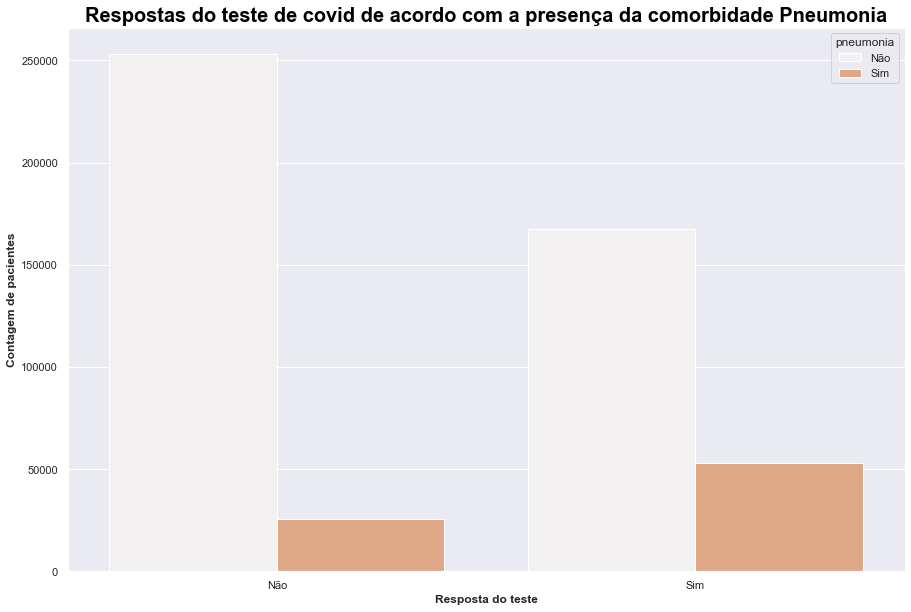

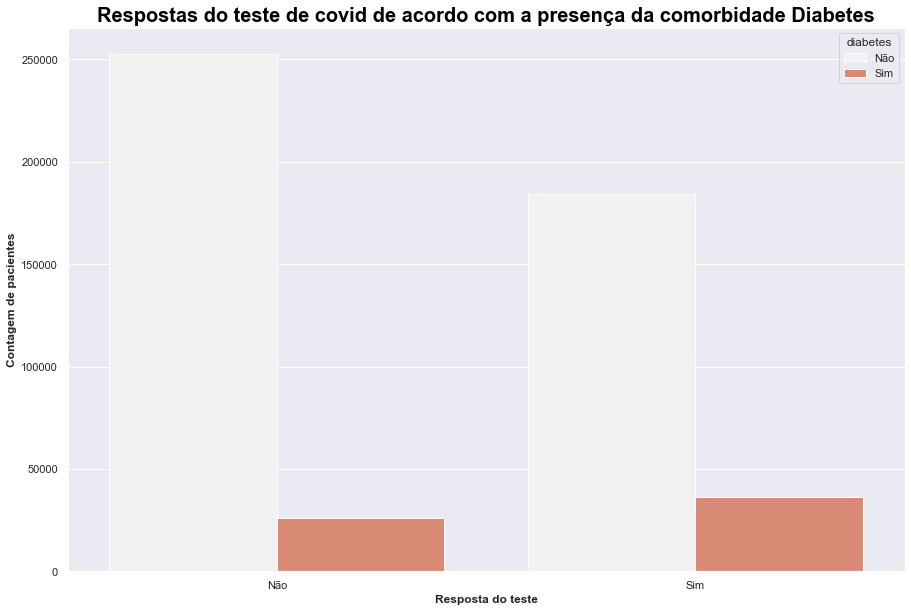

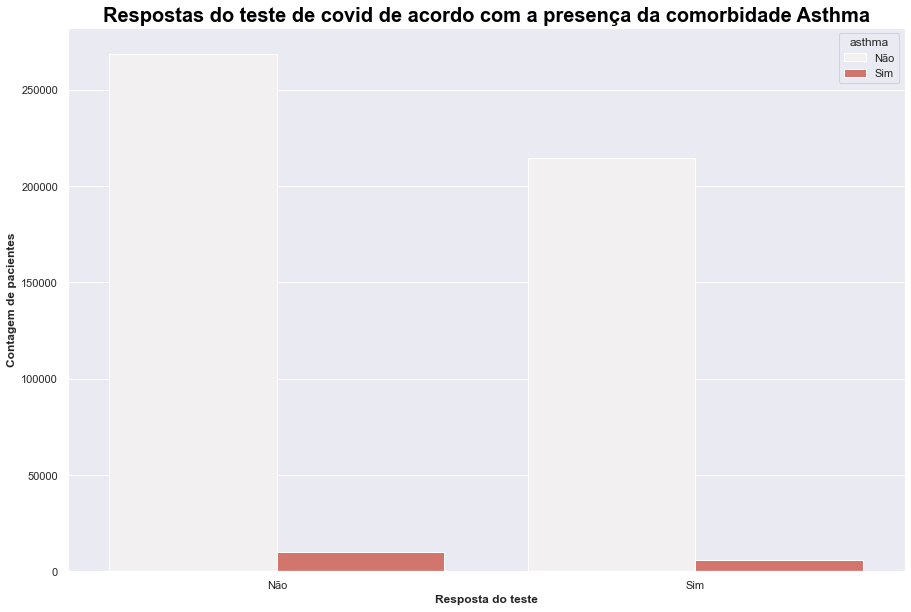

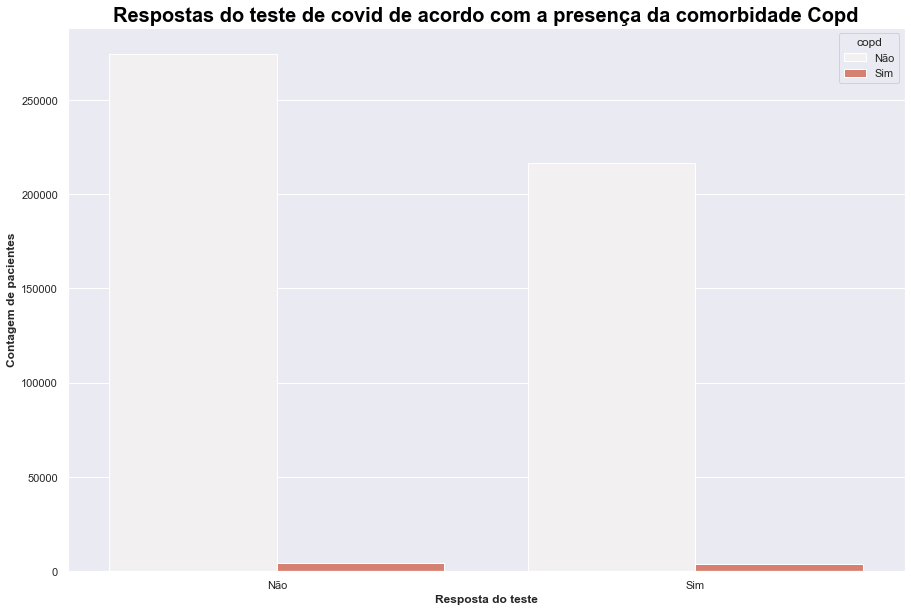

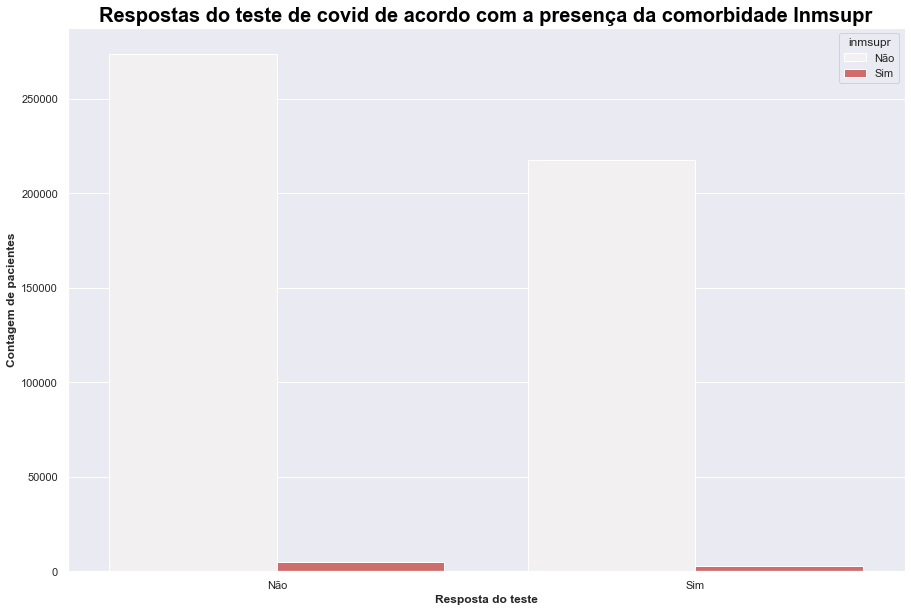

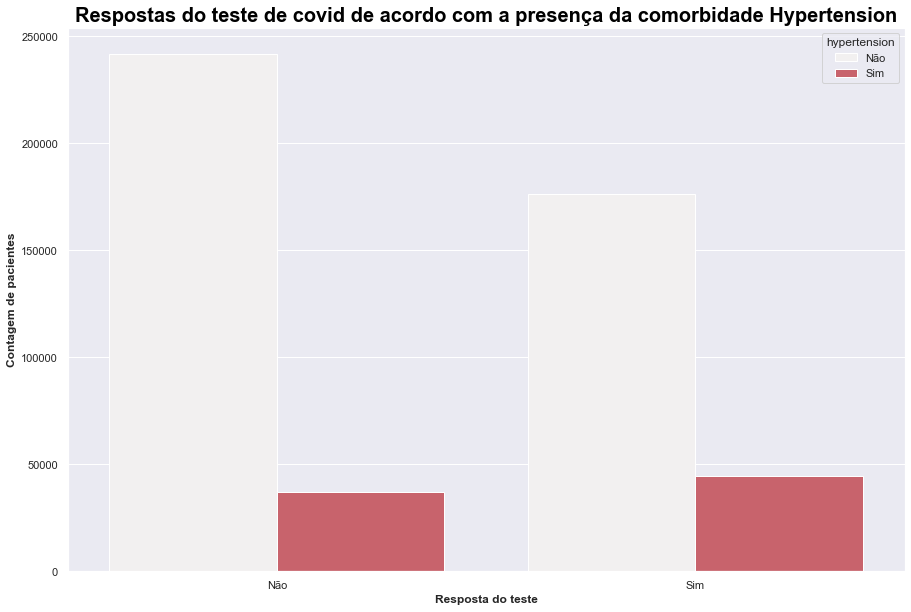

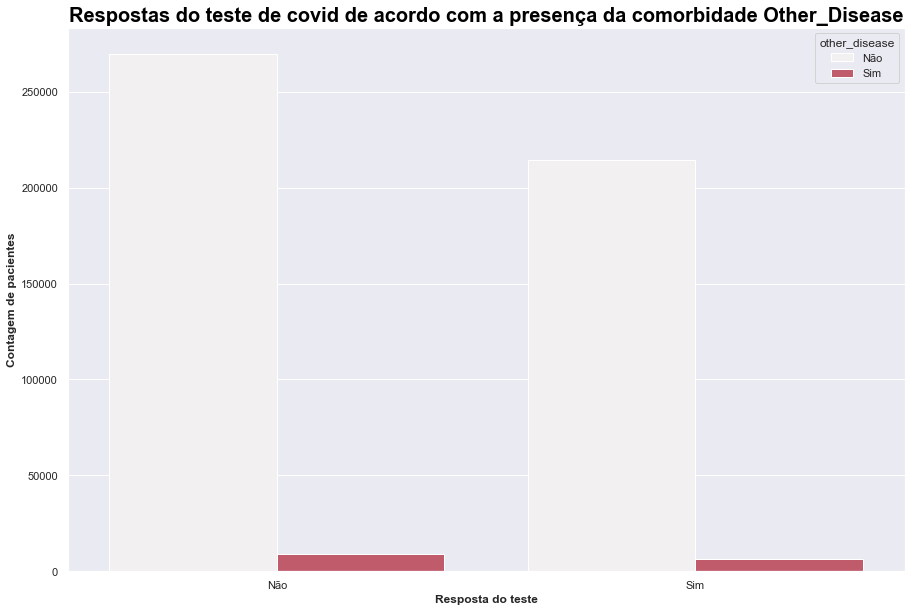

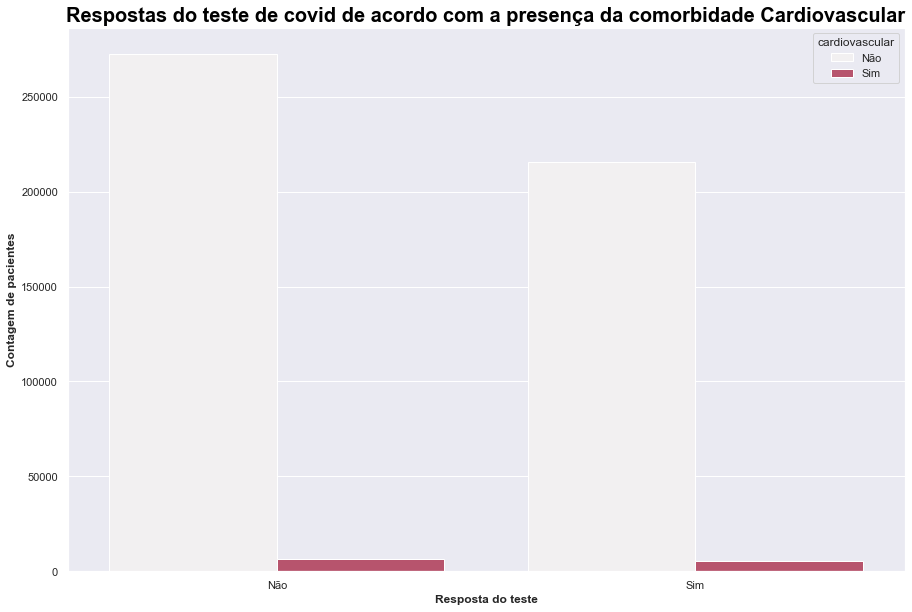

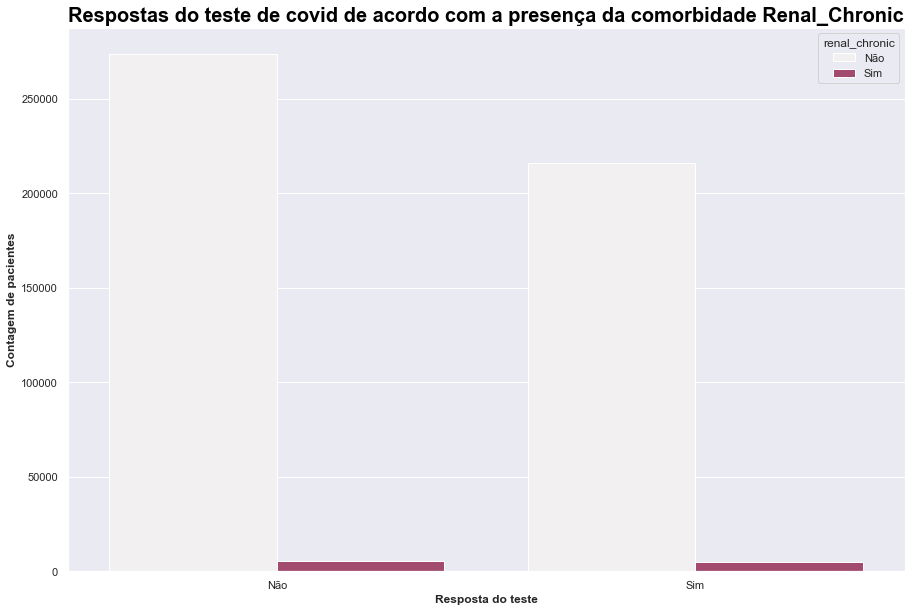

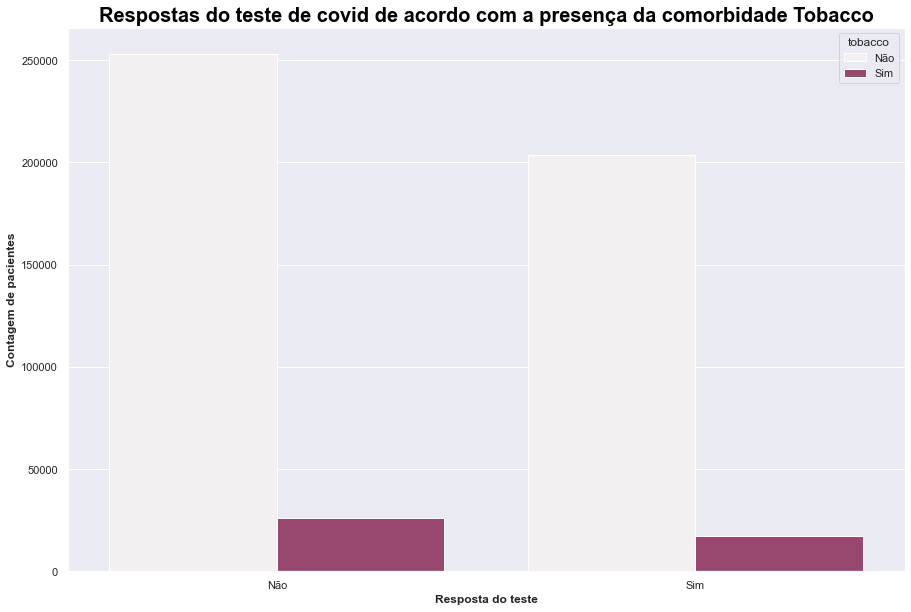

In [51]:
#Criando um countplot 

for comorbidade in comorbidades:
    graph = sns.countplot(data=df_tratado,x='covid_res',hue=comorbidade,color=colors[comorbidade])
    graph.set_title(f'Respostas do teste de covid de acordo com a presença da comorbidade {comorbidade.title()}')
    graph.set_xlabel('Resposta do teste')
    graph.set_ylabel('Contagem de pacientes')
    graph.set_xticklabels(['Não','Sim'])
    graph.legend(title=comorbidade,labels=['Não','Sim'])
    plt.show();

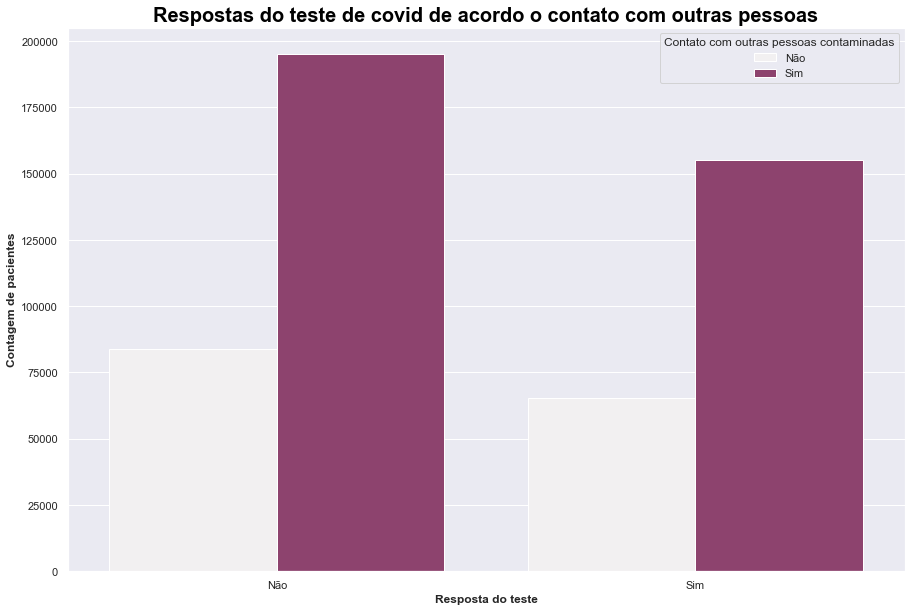

In [52]:
#Criando um countplot 
graph = sns.countplot(data=df_tratado,x='covid_res',hue='contact_other_covid',color=colors['contact_other_covid'])
graph.set_title('Respostas do teste de covid de acordo o contato com outras pessoas')
graph.set_xlabel('Resposta do teste')
graph.set_ylabel('Contagem de pacientes')
graph.set_xticklabels(['Não','Sim'])
graph.legend(title='Contato com outras pessoas contaminadas',labels=['Não','Sim']);

Esse dado é complexo de se analisar porque se a pessoa fez o teste ela tem uma alta chance de ter entrado em contato com alguem contaminado e isso fica claro pelas barras vermelhas mais expressivas do que as roxas. No entanto existe também a possibilidade de o paciente mentir nesse dado

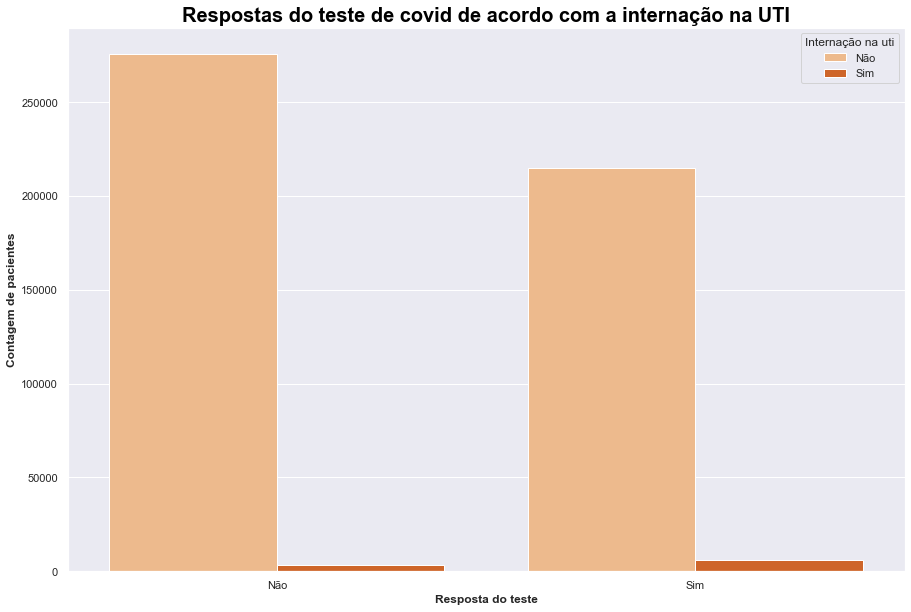

In [53]:
#Criando um countplot 
graph = sns.countplot(data=df_tratado,x='covid_res',hue='icu',palette=colors['icu'])
graph.set_title('Respostas do teste de covid de acordo com a internação na UTI')
graph.set_xlabel('Resposta do teste')
graph.set_ylabel('Contagem de pacientes')
graph.set_xticklabels(['Não','Sim'])
graph.legend(title='Internação na uti',labels=['Não','Sim']);

Tendo analisado nossos dados vamos entrar em uma etapa de feature engeneering do projeto e teste de modelos

# Passo 2: Feature Engeneering e Modelagem

## Feature Engeneering

Antes de iniciarmos a criação de novas features precisamos definir um modelo base (baseline) e qual métricas iremos priorizar a melhoria

No caso da predição do resultado do teste de covid temos que considerar que:
- Olhando para a classe 0 (resultado negativo do teste) podemos maximizar a precision, com isso, consequentemente minimizamos os falsos positivos (teste deu positivo mas falamos que deu negativo) ou o recall, com isso, minimizamos os falsos negativos (teste deu negativo mas falamos que deu positivo). Para a classe 0, o mais prejudicial seria ter uma baixa precision já que isso resultaria em aumento da transmissão
- Olhando para a classe 1 (resultado positivo do teste) podemos maximizar a precision, ou seja, reduzir os falsos positivos (teste deu negativo mas falamos que deu positivo) ou o recall,ou seja, falsos negativos (teste deu positivo mas falamos que deu negativo). Para a classe 0, o mais prejudicial seria ter um baixo recall já que isso resultaria em aumento da transmissão.

Tendo em vista esse cenário, iremos priorizar maximizar o F1 macro ou o F1 médio das duas classes, já que dessa forma conseguiriamos aumentar a precisão da classe 0 e o recall da classe 1

Vamos contruir o modelo baseline usando o XGBoost Classifier

In [54]:
#Como essa foi uma coluna criada, para termos um score do modelo sem nenhum tipo de feature engeneering, iremos remover ela por enquanto
df_tratado_base = df_tratado.drop(columns='comorbidades')
df_tratado_base

sex  patient_type  intubed  pneumonia  age  pregnancy  diabetes  copd  \
0         0             1      0.0        0.0   27        0.0       0.0   0.0   
1         0             1      0.0        0.0   24        0.0       0.0   0.0   
2         1             0      0.0        0.0   54        0.0       0.0   0.0   
3         0             0      0.0        1.0   30        0.0       0.0   0.0   
4         1             0      0.0        0.0   60        0.0       1.0   0.0   
...     ...           ...      ...        ...  ...        ...       ...   ...   
499687    0             1      0.0        1.0   77        0.0       0.0   0.0   
499688    0             0      1.0        1.0   63        0.0       0.0   0.0   
499689    1             1      0.0        0.0   25        0.0       0.0   0.0   
499690    1             1      0.0        0.0   45        0.0       0.0   0.0   
499691    1             1      0.0        0.0   51        0.0       0.0   0.0   

        asthma  inmsupr  hypertension  other_disease  cardiovascular  obesity  \
0          0.0      0.0           0.0            0.0             0.0      0.0   
1          0.0      0.0           0.0            0.0             0.0      0.0   
2          0.0      0.0           0.0            0.0             0.0      1.0   
3          0.0      0.0           0.0            0.0             0.0      0.0   
4          0.0      0.0           1.0            0.0             1.0      0.0   
...        ...      ...           ...            ...             ...      ...   
499687     0.0      0.0           0.0            1.0             0.0      0.0   
499688     0.0      0.0           1.0            0.0             0.0      1.0   
499689     0.0      0.0           0.0            0.0             0.0      0.0   
499690     0.0      0.0           1.0            0.0             0.0      0.0   
499691     0.0      0.0           0.0            0.0             0.0      0.0   

        renal_chronic  tobacco  contact_other_covid  covid_res  icu  
0                 0.0      0.0                  0.0          1  0.0  
1                 0.0      0.0                  1.0          1  0.0  
2                 0.0      0.0                  1.0          1  0.0  
3                 0.0      0.0                  1.0          1  0.0  
4                 0.0      0.0                  1.0          1  0.0  
...               ...      ...                  ...        ...  ...  
499687            0.0      1.0                  0.0          0  0.0  
499688            0.0      1.0                  0.0          0  0.0  
499689            0.0      0.0                  0.0          0  0.0  
499690            0.0      0.0                  1.0          0  0.0  
499691            0.0      0.0                  1.0          0  0.0  

[499692 rows x 19 columns]

In [55]:
def score_baseline(df_tratado):
    #Criando nosso X
    X = df_tratado.drop(columns=['covid_res'])
    #Removendo o target do X e usando ele para criar o y
    y = df_tratado['covid_res']
    #Dividindo nossa base em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)

    #Criando nosso pipeline. Como todos os dados já são numéricos não precisaremos fazer onehotencode
    #Apesar de somente a coluna idade precisar ser normalizada, aplicaremos a transformação em todas as
    #colunas como uma boa prática de sempre normalizar o dataset inteiro
    my_pipe = Pipeline(steps=[
                                ('Normalização dos dados',PowerTransformer()),
                                ('Modelagem',XGBClassifier(random_state=43,eval_metric='logloss',use_label_encoder=False))
                             ])
    #Faremos uma validação cruzada em 5 folds já que com 10 fold estava gastando um tempo elevado para estimar as métricas
    #Apesar de buscarmos a maximização do f1, olharemos para todas as métricas de classificação relevantes
    #(Recall, Precision, F1, Acurácia, AUC)
    
    metrics = ['recall','precision','f1','accuracy','roc_auc']

    scores = cross_validate(
                                estimator = my_pipe, #o pipeline
                                X = X_train, #será usado para treino e validação
                                y = y_train, #será usado para treino e validação
                                scoring= metrics, #lista de métricas que queremos
                                cv = 5, #numero de folds
                                return_train_score=True, #Para olhar como estão as métricas no treino e comparar com o teste,
                                n_jobs=-1 #para paralelizar o máximo possível
                           )
    #Colocando tudo em um dataframe, usando o describe para pegar as principais medidas e dando um transpose para facilitar a visulização
    table = pd.DataFrame(scores).describe().T.iloc[2:,:] #apenas para remover as linhas iniciais que são métricas de tempo de fit
    return table


In [56]:
#Vamos salvar em uma databela para posteriormente compararmos
table_baseline = score_baseline(df_tratado=df_tratado_base)

In [57]:
table_baseline

count      mean       std       min       25%       50%  \
test_recall        5.0  0.349662  0.004704  0.345050  0.346778  0.349157   
train_recall       5.0  0.358456  0.002145  0.355821  0.356479  0.359475   
test_precision     5.0  0.664272  0.003186  0.660378  0.661676  0.665281   
train_precision    5.0  0.679741  0.002239  0.676660  0.678646  0.679599   
test_f1            5.0  0.458150  0.004738  0.453267  0.455062  0.457963   
train_f1           5.0  0.469380  0.001585  0.467650  0.467654  0.470315   
test_accuracy      5.0  0.634789  0.002105  0.632425  0.633246  0.635022   
train_accuracy     5.0  0.642122  0.000623  0.641516  0.641616  0.642133   
test_roc_auc       5.0  0.650678  0.001404  0.648590  0.650240  0.650795   
train_roc_auc      5.0  0.663844  0.001026  0.662947  0.663181  0.663622   

                      75%       max  
test_recall      0.350007  0.357315  
train_recall     0.360098  0.360409  
test_precision   0.665858  0.668167  
train_precision  0.681812  0.681990  
test_f1          0.458831  0.465627  
train_f1         0.470528  0.470752  
test_accuracy    0.635414  0.637841  
train_accuracy   0.642274  0.643073  
test_roc_auc     0.651425  0.652340  
train_roc_auc    0.663921  0.665550

Vamos calcular a mutual information de cada feature com a variável target. Para isso vamos usar uma função

In [58]:
def make_mi_scores(df_tratado_base):
    #Criando nosso X
    X = df_tratado_base.drop(columns=['covid_res']) 
    #Removendo o target do X e usando ele para criar o y
    y = df_tratado_base['covid_res']
    # Todas as features com tipo numérico inteiro devem estar como int para esse método funcionar
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=43)
    #Criando uma serie
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    #Ordenando do maior para o menor
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    #Definindo tamanho de cada barra
    width = np.arange(len(scores))
    #Definindo o nome de cada barra
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

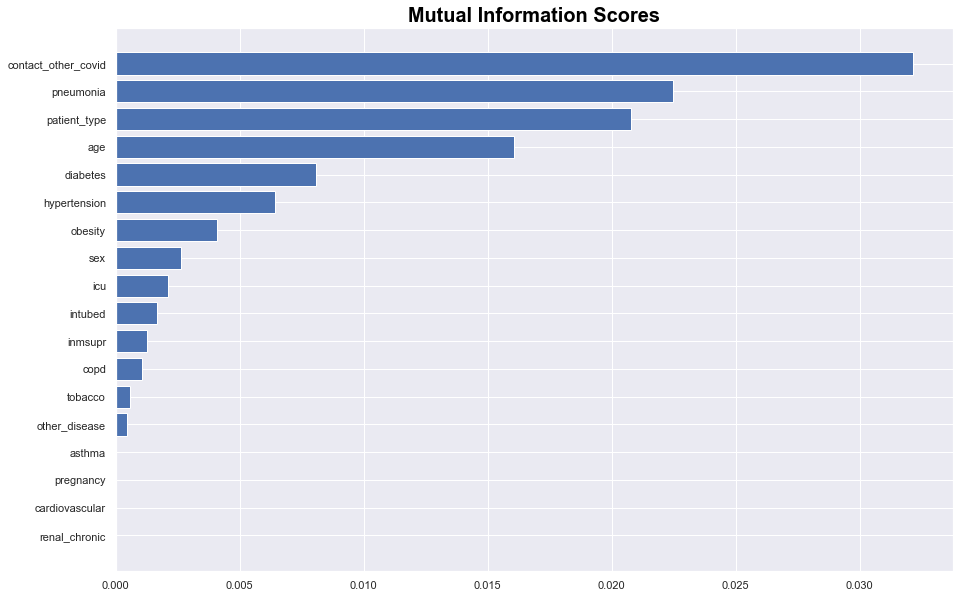

In [65]:
scores = make_mi_scores(df_tratado_base=df_tratado_base)
plot_mi_scores(scores)

Percebbemos que as features asthma, pregnancy, cardiovascular e renal_chornic tem mutual information zero com a variável target e, dessa forma, faremos um teste de dropar elas e ver se nosso modelo melhora. Se o modelo não melhorar é provavel que elas tenham relação com outras variáveis e o modelo se aproveita disso

Contact_other_covid, Pneumonia, patient_type, age, diabete, hupertension e obesity tem um mi score alto, mostrando que contem muita informação 

In [60]:
def drop_low_mi(X):
    X = X.drop(columns=['asthma','pregnancy','cardiovascular','renal_chronic'])
    return X

In [61]:
table_baseline #para comparar com o que iremos calcular agora

count      mean       std       min       25%       50%  \
test_recall        5.0  0.349662  0.004704  0.345050  0.346778  0.349157   
train_recall       5.0  0.358456  0.002145  0.355821  0.356479  0.359475   
test_precision     5.0  0.664272  0.003186  0.660378  0.661676  0.665281   
train_precision    5.0  0.679741  0.002239  0.676660  0.678646  0.679599   
test_f1            5.0  0.458150  0.004738  0.453267  0.455062  0.457963   
train_f1           5.0  0.469380  0.001585  0.467650  0.467654  0.470315   
test_accuracy      5.0  0.634789  0.002105  0.632425  0.633246  0.635022   
train_accuracy     5.0  0.642122  0.000623  0.641516  0.641616  0.642133   
test_roc_auc       5.0  0.650678  0.001404  0.648590  0.650240  0.650795   
train_roc_auc      5.0  0.663844  0.001026  0.662947  0.663181  0.663622   

                      75%       max  
test_recall      0.350007  0.357315  
train_recall     0.360098  0.360409  
test_precision   0.665858  0.668167  
train_precision  0.681812  0.681990  
test_f1          0.458831  0.465627  
train_f1         0.470528  0.470752  
test_accuracy    0.635414  0.637841  
train_accuracy   0.642274  0.643073  
test_roc_auc     0.651425  0.652340  
train_roc_auc    0.663921  0.665550

In [62]:
#Criando o dataset para testar se tivemos melhora nas métricas
teste_improve_recall = drop_low_mi(df_tratado_base)
#Chamando a função para calcularmos as métricas
score_baseline(teste_improve_recall)

count      mean       std       min       25%       50%  \
test_recall        5.0  0.347333  0.003661  0.342020  0.347260  0.347345   
train_recall       5.0  0.354478  0.001400  0.352365  0.353795  0.355013   
test_precision     5.0  0.663984  0.002958  0.660667  0.661281  0.664265   
train_precision    5.0  0.677499  0.001779  0.675590  0.675980  0.677509   
test_f1            5.0  0.456081  0.003694  0.450854  0.455237  0.456162   
train_f1           5.0  0.465432  0.001330  0.463611  0.464487  0.466112   
test_accuracy      5.0  0.634177  0.001700  0.632087  0.632996  0.634276   
train_accuracy     5.0  0.640434  0.000725  0.639758  0.639949  0.640085   
test_roc_auc       5.0  0.649614  0.001449  0.647184  0.649700  0.649850   
train_roc_auc      5.0  0.660493  0.000832  0.659733  0.660121  0.660131   

                      75%       max  
test_recall      0.347684  0.352358  
train_recall     0.355424  0.355792  
test_precision   0.666576  0.667131  
train_precision  0.678555  0.679864  
test_f1          0.456999  0.461151  
train_f1         0.466144  0.466807  
test_accuracy    0.635147  0.636377  
train_accuracy   0.640920  0.641459  
test_roc_auc     0.650343  0.650993  
train_roc_auc    0.660606  0.661873

Não houve melhora de recall no test com o drop das features com mi score baixo

Vamos tentar criar algumas features fazendo transformações de colunas no pandas e ver se isso melhora nosso modelo.

In [ ]:
'''def pandas_features(df):

    X = df.copy()
    
    #1) Coluna comorbidade
    #Piorou o modelo não iremos usá-la
    X['comorbidades'] = X['comorbidades'] = X[['pneumonia',
                                        'diabetes',
                                        'asthma',
                                        'copd',
                                        'inmsupr',
                                        'hypertension',
                                        'other_disease',
                                        'cardiovascular',
                                        'renal_chronic',
                                        'tobacco']].gt(0).sum(axis=1)

    #2) Coluna severidade
    #Piorou o modelo não iremos usá-la
    #Grau de severidade, onde os pesos foram definidos com base no EDA e nos mi score
    X['severidade'] = 3*X['pneumonia'] + 2*(X['diabetes']+X['hypertension']) + 1*X['obesity'] + 0.5*(X['inmsupr']+X['copd']+X['other_disease'])
    X = X.drop(columns=['pneumonia','diabetes','hypertension','obesity','inmsupr','copd','other_disease'])
    #Foi testado adicionando a coluna somente e adicionado a coluna e dropando as colunas que a originaram

    return X'''

Infelizmente, nenhuma dessas features melhorou em nada o F1 do modelo. Vamos tentar também construir uma nova feature envolvendo ranges de idades

In [63]:
#idades para construir o range
ranges = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140]

df_teste_feature_eng = df_tratado_base.copy()
#nova coluna com os ranges de idades
df_teste_feature_eng['age_ranges'] = pd.cut(df_tratado_base['age'],bins=ranges)
#Fazendo o onehot dessa coluna categórica
dummies = pd.get_dummies(data=df_teste_feature_eng['age_ranges'],drop_first=True)

#juntando a coluna de dummies e dropando a coluna de ranges de idade
df_teste_feature_eng = df_teste_feature_eng.join(dummies).drop(columns='age_ranges')

In [64]:
score_baseline(df_teste_feature_eng)

count      mean       std       min       25%       50%  \
test_recall        5.0  0.348563  0.004145  0.343521  0.346778  0.348364   
train_recall       5.0  0.357662  0.001672  0.355736  0.356012  0.358327   
test_precision     5.0  0.664514  0.002940  0.661033  0.662262  0.665170   
train_precision    5.0  0.681275  0.002509  0.678841  0.678950  0.680930   
test_f1            5.0  0.457264  0.004194  0.452385  0.454910  0.457254   
train_f1           5.0  0.469063  0.001177  0.467327  0.468387  0.469596   
test_accuracy      5.0  0.634632  0.001880  0.632750  0.633021  0.634809   
train_accuracy     5.0  0.642459  0.000690  0.641894  0.641963  0.642017   
test_roc_auc       5.0  0.650594  0.001628  0.648445  0.650004  0.650312   
train_roc_auc      5.0  0.664113  0.000740  0.663342  0.663410  0.664295   

                      75%       max  
test_recall      0.349299  0.354851  
train_recall     0.358922  0.359312  
test_precision   0.665623  0.668481  
train_precision  0.683224  0.684428  
test_f1          0.458166  0.463605  
train_f1         0.469903  0.470102  
test_accuracy    0.635177  0.637403  
train_accuracy   0.643140  0.643282  
test_roc_auc     0.651403  0.652806  
train_roc_auc    0.664416  0.665102

Essa criação dos clusters de idade também não melhorou o F1 do nosso modelo

Temos algumas features que tem um enorme probabilidade de ocorreram após o resultado do teste, sendo elas:
- intubação
- icu
- patient_type

Vamos testar dropar elas e avaliar a performance do modelo



In [69]:
df_droped = df_tratado_base.drop(columns=['intubed','icu','patient_type'])
score_baseline(df_droped)

count      mean       std       min       25%       50%  \
test_recall        5.0  0.344591  0.004269  0.340008  0.340235  0.346240   
train_recall       5.0  0.353017  0.000578  0.352358  0.352570  0.352939   
test_precision     5.0  0.637727  0.003467  0.632810  0.635603  0.639196   
train_precision    5.0  0.652274  0.001509  0.651188  0.651226  0.651599   
test_f1            5.0  0.447410  0.003914  0.443026  0.444181  0.447585   
train_f1           5.0  0.458102  0.000484  0.457561  0.457622  0.458335   
test_accuracy      5.0  0.624138  0.001711  0.622481  0.622589  0.623990   
train_accuracy     5.0  0.631197  0.000517  0.630859  0.630922  0.630935   
test_roc_auc       5.0  0.643288  0.000890  0.641961  0.643188  0.643328   
train_roc_auc      5.0  0.655193  0.000852  0.654594  0.654753  0.654831   

                      75%       max  
test_recall      0.346891  0.349582  
train_recall     0.353604  0.353611  
test_precision   0.639583  0.641443  
train_precision  0.652573  0.654782  
test_f1          0.449720  0.452535  
train_f1         0.458339  0.458655  
test_accuracy    0.625133  0.626496  
train_accuracy   0.631173  0.632097  
test_roc_auc     0.643514  0.644447  
train_roc_auc    0.655109  0.656680

Infelizmente essa abordagem de dropar algumas features também não melhorou a performance do modelo em relação a métrica F1

Como nenhuma das abordagens de feature engeneering usadas melhorou nosso modelo usaremos o dataset com as features originais e testaremos diferentes modelos

## Modelagem

Treinaremos 8 modelos diferentes

In [54]:
#Criando um dicionário com alguns modelos de classificação que testaremos
models = {  'Decision Tree': DecisionTreeClassifier(random_state=43),
            'Random Forest': RandomForestClassifier(random_state=32),
            'Gradiente Boost': GradientBoostingClassifier(random_state=43),
            'Ada Boost': AdaBoostClassifier(random_state=43),
            'Regressão Logística': LogisticRegression(random_state=43),
            'XGBoost': XGBClassifier(random_state=43,eval_metric='logloss',use_label_encoder=False),
            'LGBM': LGBMClassifier(random_state=43),
            'Catboost': CatBoostClassifier(random_state=43,verbose=False)
         }

#Função para treinar e validar os modelos
def model_predictions(df,models):
    #Criando nosso X e y
    X = df.drop(columns=['covid_res']) 
    y = df['covid_res']
    #Dividindo nossa base em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)

    #Dicionário em que salvaremos as métricas de cada modelo
    metrics_model_dict = {}
    #Lista com os estimadores
    estimators = []

    #Faremos o processo abaixo para cada modelo
    for model in models:
        #Somente para termos uma noção do que está ocorrendo já que será um fit demorado
        print(f"Fit do modelo {model} iniciado...")
        
        #Criando nosso pipeline. Como todos os dados já são numéricos não precisaremos fazer onehotencode
        #Apesar de somente a coluna idade precisar ser normalizada, aplicaremos a transformação em todas as
        #colunas como uma boa prática de sempre normalizar o dataset inteiro
        my_pipe = Pipeline(steps=[
                                    ('Normalização dos dados',PowerTransformer()),
                                    (model,models[model])
                                ])
        #Faremos uma validação cruzada em 5 folds já que com 10 fold estava gastando um tempo elevado para estimar as métricas
        #Apesar de buscarmos a maximização do F1, olharemos para todas as métricas de classificação relevantes
        #(Recall, Precision, F1, Acurácia, AUC)
        
        metrics = ['recall','precision','f1','accuracy','roc_auc']
        
        scores = cross_validate(
                                    estimator = my_pipe, #o pipeline
                                    X = X_train, #será usado para treino e validação
                                    y = y_train, #será usado para treino e validação
                                    scoring= metrics, #lista de métricas que queremos
                                    cv = 5, #numero de folds
                                    return_train_score=True, #Para olhar como estão as métricas no treino e comparar com o teste,
                                    return_estimator = True,
                                    n_jobs=-1 #para paralelizar o máximo possível
                            )
        # Dicionário com as métricas de cada modelo                    
        metrics_model_dict[model] = {'recall_test': scores['test_recall'].mean(),
                                     'recall_train': scores['train_recall'].mean(),
                                     'precision_test': scores['test_precision'].mean(),
                                     'precision_train': scores['train_precision'].mean(),
                                     'f1_test': scores['test_f1'].mean(),
                                     'f1_train': scores['train_f1'].mean(),
                                     'accuracy_test': scores['test_accuracy'].mean(),
                                     'accuracy_train': scores['train_accuracy'].mean(),
                                     'roc_auc_test': scores['test_roc_auc'].mean(),
                                     'roc_auc_train': scores['train_roc_auc'].mean(),
                                    }
        
        estimators.append(scores['estimator'])
        #Para sabermos quando um modelo foi fitado e o tempo que está levando
        print(f"Fit do modelo {model} finalizado: fit_time: {scores['fit_time'].mean():.2f} e score_time: {scores['score_time'].mean():.2f}")
    #Criando uma tabela com cada métrica como uma linha e cada modelo como uma coluna
    tabela = pd.DataFrame(metrics_model_dict)
    return tabela,estimators

def plot_roc_auc(df,models):
    #Criando nosso X e y
    X = df.drop(columns=['covid_res']) 
    y = df['covid_res']
    #Dividindo nossa base em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)

    #Dicionário em que salvaremos as métricas de cada modelo
    for model in models:
        my_pipe = Pipeline(steps=[
                                        ('Normalização dos dados',PowerTransformer()),
                                        (model,models[model])
                                    ])
        #Fazendo o fit do modelo
        my_pipe.fit(X_train,y_train)
        #Fazendo o predict do modelo
        y_pred = my_pipe.predict(X_test)
        #Calculando as métricas para plotar a curva roc-auc
        fpr, tpr, thresholds = roc_curve(y_test,y_pred)
        auc = roc_auc_score(y_test,y_pred)
        #Plotando o gráfico
        graph = sns.lineplot(y=tpr,x=fpr,label=f'{model} AUC: {auc:.3f}')

    #Definindo as formatações do plot do plot
    plt.title('ROC-AUC Curve')
    plt.ylabel('True Positive Rate')
    plt.xlim(0,1.0)
    plt.ylim(0,1.0)
    plt.xlabel('False Positive Ratio')
    plt.legend()
    plt.show()    

In [57]:
df_models,estimators = model_predictions(df_tratado_base,models)

Fit do modelo Decision Tree iniciado...
Fit do modelo Decision Tree finalizado: fit_time: 24.95 e score_time: 0.51
Fit do modelo Random Forest iniciado...
Fit do modelo Random Forest finalizado: fit_time: 104.18 e score_time: 5.78
Fit do modelo Gradiente Boost iniciado...
Fit do modelo Gradiente Boost finalizado: fit_time: 124.91 e score_time: 1.47
Fit do modelo Ada Boost iniciado...
Fit do modelo Ada Boost finalizado: fit_time: 55.08 e score_time: 3.91
Fit do modelo Regressão Logística iniciado...
Fit do modelo Regressão Logística finalizado: fit_time: 32.04 e score_time: 0.80
Fit do modelo XGBoost iniciado...
Fit do modelo XGBoost finalizado: fit_time: 78.82 e score_time: 0.92
Fit do modelo LGBM iniciado...
Fit do modelo LGBM finalizado: fit_time: 28.04 e score_time: 2.50
Fit do modelo Catboost iniciado...
Fit do modelo Catboost finalizado: fit_time: 212.48 e score_time: 0.73


In [68]:
df_models.T.sort_values(by='f1_test',ascending=False)

recall_test  recall_train  precision_test  \
Regressão Logística     0.362425      0.362620        0.646325   
Ada Boost               0.356998      0.357237        0.654952   
XGBoost                 0.349662      0.358456        0.664272   
Catboost                0.348959      0.359295        0.664778   
LGBM                    0.347679      0.351150        0.668766   
Gradiente Boost         0.343062      0.344069        0.669298   
Random Forest           0.348183      0.414474        0.624524   
Decision Tree           0.327098      0.395423        0.627312   

                     precision_train   f1_test  f1_train  accuracy_test  \
Regressão Logística         0.646536  0.464419  0.464639       0.630882   
Ada Boost                   0.655532  0.462104  0.462452       0.633011   
XGBoost                     0.679741  0.458150  0.469380       0.634789   
Catboost                    0.683430  0.457662  0.470981       0.634809   
LGBM                        0.675403  0.457481  0.462054       0.635895   
Gradiente Boost             0.671111  0.453602  0.454901       0.635050   
Random Forest               0.741791  0.447091  0.531802       0.619723   
Decision Tree               0.759547  0.429976  0.520086       0.617044   

                     accuracy_train  roc_auc_test  roc_auc_train  
Regressão Logística        0.631000      0.643136       0.643235  
Ada Boost                  0.633269      0.646270       0.646632  
XGBoost                    0.642122      0.650678       0.663844  
Catboost                   0.643579      0.650756       0.666618  
LGBM                       0.638948      0.652424       0.657923  
Gradiente Boost            0.635886      0.651708       0.653042  
Random Forest              0.677730      0.622817       0.721440  
Decision Tree              0.677749      0.613954       0.724015

Os melhores modelos em relação ao critério F1 foram a Regressão Logística, o Ada Boost e o XGboost. Os modelos mais complexos tendem a precisar de mais tunning dos hipermarâmetros para funcionar melhor e portanto tentaremos otimizá-los também. No entanto, os resultados não aperentam ser muito promissores, já que nossos f1's estão inferiores a 50%

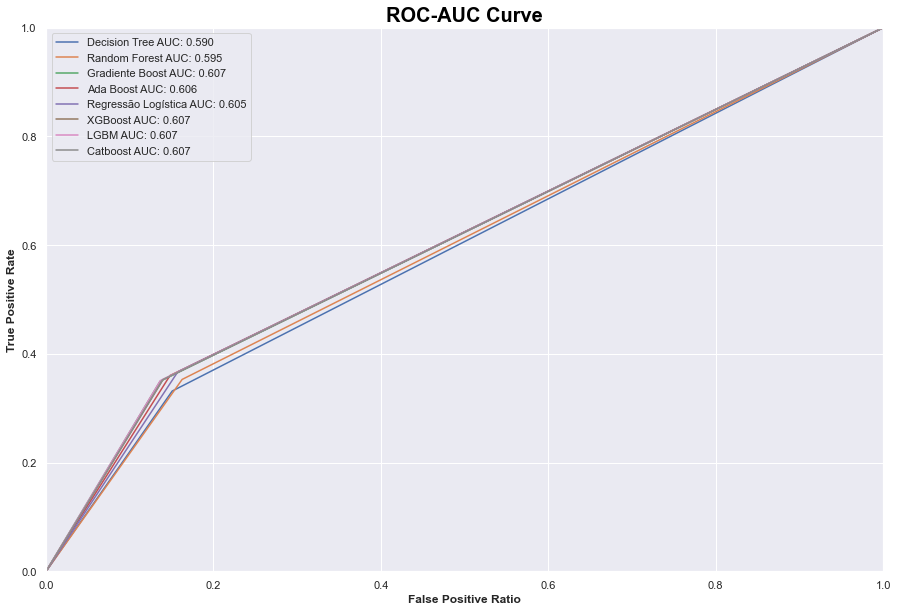

In [69]:
plot_roc_auc(df_tratado_base,models)

Olhando para as curvas ROC vemos que não temos nenhum trashold em que nossa taxa de verdadeiros positivos seja alta em conjunto com uma taxa de falsos positivos baixa. Se analisarmos o AUC das curvas, eles são levemente melhores do que o lançamento de uma moeda, o que é um mau sinal. Aparentemente nosso modelo está com um vies muito alto e não está conseguindo capturar o comportamento da variável target

Antes de começar a otimização de hiperparâmetros vamos olhar para as features que foram mais importantes para nossos 3 modelos

In [106]:
estimators

[[Pipeline(steps=[('Normalização dos dados', PowerTransformer()),
                  ('Decision Tree', DecisionTreeClassifier(random_state=43))]),
  Pipeline(steps=[('Normalização dos dados', PowerTransformer()),
                  ('Decision Tree', DecisionTreeClassifier(random_state=43))]),
  Pipeline(steps=[('Normalização dos dados', PowerTransformer()),
                  ('Decision Tree', DecisionTreeClassifier(random_state=43))]),
  Pipeline(steps=[('Normalização dos dados', PowerTransformer()),
                  ('Decision Tree', DecisionTreeClassifier(random_state=43))]),
  Pipeline(steps=[('Normalização dos dados', PowerTransformer()),
                  ('Decision Tree', DecisionTreeClassifier(random_state=43))])],
 [Pipeline(steps=[('Normalização dos dados', PowerTransformer()),
                  ('Random Forest', RandomForestClassifier(random_state=32))]),
  Pipeline(steps=[('Normalização dos dados', PowerTransformer()),
                  ('Random Forest', RandomForestClassifie

In [58]:
# Na vavariável estimators, temos 8 listas, sendo que cada um dela contém 5 pipelines para cada validação cruzada e cada pipeline contem 2 tempos (normalização e modelo). 
# Para acessar a feature importance de cada fold temos que usar: estimators[indice em que o modelo se encontra][indice da fold][nome do modelo no pipeline].metodo que retorna feature importance
# Os modelos Regressão logística, Ada Boost e XGBoost correspondem aos indices 3,4 e 5


estimators_selected = {'Ada Boost':estimators[3],"Regressão Logística":estimators[4],"XGBoost":estimators[5]}

#dicionário para salvar as features importânce médias após o final do loop abaixo
list_feature_importance_final = {}

#Primeiro vamos fazer um loop para cada chave do dicionário "estimators_selected"
for estimator in estimators_selected:
    #Pegando a feature importânce da primeira fold para o primeiro modelo
    if estimator == "Regressão Logística":
        feature_importance_sum = estimators_selected[estimator][0][estimator].coef_[0]
    else:
        feature_importance_sum = estimators_selected[estimator][0][estimator].feature_importances_
    #Loop para somar as features importânces 2,3,4,5 de cada fold a variável de soma acima
    for i in range(1,5):
        #Se for regressão logística a feature importânce é com o método coef
        if estimator == "Regressão Logística":
            feature_importance_sum += estimators_selected[estimator][i][estimator].coef_[0]
        else:
            feature_importance_sum += estimators_selected[estimator][i][estimator].feature_importances_
    #Adicionando ao dicionário list_feature_importance_final o valor médio cada importância de feature (média das 5 folds)
    list_feature_importance_final[estimator] = feature_importance_sum/5 

list_feature_importance_final

#Como a regressão logística dá coenficientes negativos e não são no range de 0 a 1. Vamos alterar isso para deixar mais comparável com o Adaboost e com o Xgboost

list_feature_importance_final['Regressão Logística'] = np.abs(list_feature_importance_final['Regressão Logística'])
list_feature_importance_final['Regressão Logística'] = list_feature_importance_final['Regressão Logística']/list_feature_importance_final['Regressão Logística'].sum()


Text(0, 0.5, 'Features')

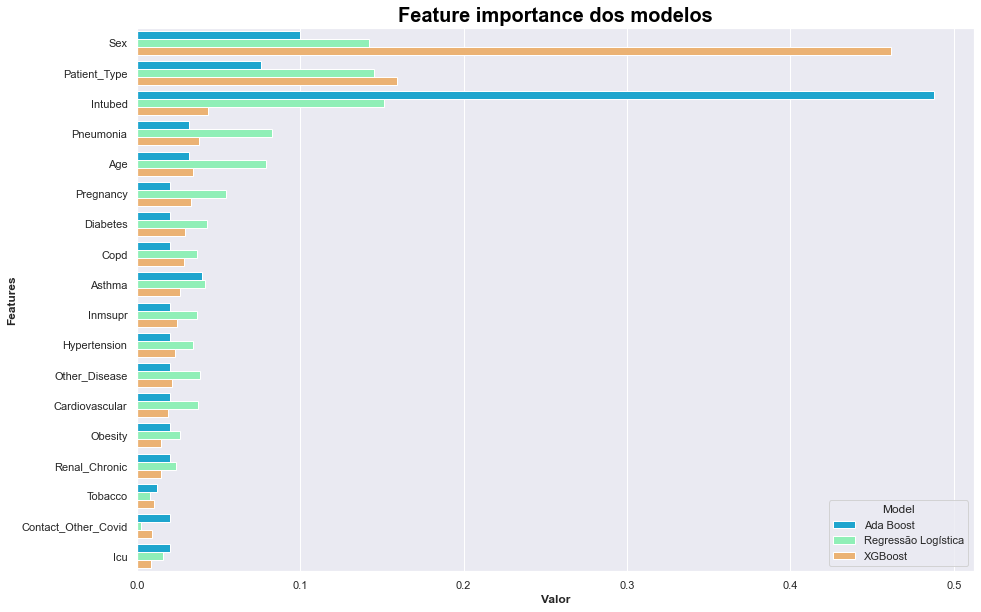

In [60]:
#Criando um dataframe para facilitar o plot
plot_df = pd.DataFrame(list_feature_importance_final).sort_values(by=['XGBoost','Ada Boost','Regressão Logística'],ascending=False)
#Criando uma coluna com o nome das features
plot_df['features_name'] = ['sex', 'patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid','icu']
       
plot_df['features_name'] = plot_df['features_name'].str.title()
#Fazendo um melt do dataset para conseguirmos usar o modelo de hue e plot todas as feature importânce em um único gráfico
plot_df = plot_df.melt(value_name='Value',var_name='Model',id_vars='features_name',value_vars=['Ada Boost','Regressão Logística','XGBoost'])
# Como os coeficentes da regressão logística podem ser negativos, vamos deixar o numero absoluto
plot_df['Value'] = np.abs(plot_df['Value'])

graph = sns.barplot(data=plot_df,x='Value',y='features_name',hue='Model',palette='rainbow')
graph.set_title('Feature importance dos modelos')
graph.set_xlabel('Valor')
graph.set_ylabel('Features')

Anlisando a feature importânce dos melhores modelos percebemos que:

Ada Boost:
- Dá um peso muito grande para a intubação, o que é preocupante já que a intubação ocorre normalmente após o teste quando o quadro se complica. Então o modelo está sendo mais influenciado por uma variável que na maior parte dos casos ocorre após a predição
- O segundo maior peso é o sexo, que é uma variável que não influencia no teste na vida real, no dataset que escolhemos os homens deram mais positivo do que negativo e nas mulheres foi o contrario. No entanto, no mundo real a população é 50% de cada sexo e isso não deveria ser o segundo maior peso no nosso modelo
- O terceiro maior peso é a dispensa ou internação que é algo que na maioria dos casos também ocorrerá após o teste

Regressão Logística
- Os 3 primeiros maiores pesos são iguais ao adaboost e podemos chegar a conclusões semelhantes
- O 4 maior peso é a presença ou ausência de pneumonia que realmente pode influenciar o teste ser positivo já que é uma doença não tão frequente na população em condições normais e bastante frequente em pessoas com sintomas graves de covid ou grupo de risco
- O 5 peso, idade, se relaciona com o quarto peso e pessoas com pneumonia e idades avançadas, por exemplo, tendem a ter resultados semelhantes no teste

XGboost
- Apresenta o maior peso para a variável sexo, o que cai no mesmo caso do adaboost, sendo um mau sinal
- O 2 e 3 maiores pesos caem também nas mesmas conclusões do adaboost



Esse comportamento pode se alterar após o tunning dos modelos, mas não é um bom sinal e pode indicar que:
- Os modelos não estão conseguindo capturar o comportamento dos dados
- Os dados não são relevantes para prever a target desejada

Vamos iniciar agora uma etapa de tentativa de tunning dos modelos

# Passo 3: Tunning dos modelos

Para realizar o tunning dos modelos, precisaremos analisar cada hipermarâmetro e criar um grid de otimização

## Ada Boost

Ele tem os seguintes hiperparâmetros:

- base_estimator: modelo que ele usarará para criar os stamps. O que é usado aqui quando esse hiperâmetro fica vazio é o DecisionTreeClassifier com uma profundidade máxima = 1 já que o ada boost cria arvores com um nó diversas vezes e aprende com esse modelo. Esse hiperâmetro não iremos alterar
- n_estimators: aqui são o número de stamps que ele usará
- learning_rate: a contribuição de cada stamp para a construção dos novos pesos. Learning rate proximos de 1 significa que o modelo irá aprender mais rapido mas ele pode ser menos preciso
- algorithm: os dois algorítmos possíveis aqui são o SAMME e o SAMMER. O primeiro usa o resultado da classificação para atualizar os pesos de cada erro/acerto do modelo e o segundo usa probabilidade para isso

Vamos usar o optuna e tentaremos otimizar a métrica F1

In [55]:
#Só haviamos definido X,y, os splits e a normalização dentro de funções e o optuna usa varíaveis globais nos estudos
#Dessa forma defineremos aqui normavamente
X = df_tratado.drop(columns=['covid_res']) 
y = df_tratado['covid_res']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)

power = PowerTransformer()
X_train_norm = power.fit_transform(X_train)
X_test_norm = power.transform(X_test)

In [73]:
#definindo uma função objetivo
def objective(trial):
    #Definindo o dicionário com o grid de parâmetros que testaremos
    params = dict(
        n_estimators = trial.suggest_int('n_estimators',200,2000,100),
        learning_rate = trial.suggest_float('learning_rate',0.01,0.2),
        algorithm = trial.suggest_categorical('algorithm',['SAMME', 'SAMME.R'])
    )
    #Instanciado o modelo
    model = AdaBoostClassifier(**params,random_state=42)
    #O que queremos maximizar é a métrica F1 e para isso faremos um cross validation de 3 folds, como teremos 3 F1 de retorno (para cada fold), pegaremos a média deles
    return cross_validate(model,
                        X_train_norm,
                        y_train,
                        scoring=['f1'],
                        cv = 3,
                        n_jobs=-1)['test_f1'].mean()

study = optuna.create_study(direction="maximize",study_name ='Ada Boost Study')
study.optimize(objective, n_trials=40)
adaboost_params = study.best_params

[I 2022-02-13 23:15:20,747] A new study created in memory with name: Ada Boost Study
[I 2022-02-13 23:28:22,612] Trial 0 finished with value: 0.4668730343429584 and parameters: {'n_estimators': 1900, 'learning_rate': 0.18632280879918955, 'algorithm': 'SAMME.R'}. Best is trial 0 with value: 0.4668730343429584.
[I 2022-02-13 23:31:45,613] Trial 1 finished with value: 0.43812964739257754 and parameters: {'n_estimators': 500, 'learning_rate': 0.11849698228249063, 'algorithm': 'SAMME'}. Best is trial 0 with value: 0.4668730343429584.
[I 2022-02-13 23:38:12,724] Trial 2 finished with value: 0.4460586787732376 and parameters: {'n_estimators': 1000, 'learning_rate': 0.15468273851921124, 'algorithm': 'SAMME'}. Best is trial 0 with value: 0.4668730343429584.
[I 2022-02-13 23:48:56,345] Trial 3 finished with value: 0.46311849971942404 and parameters: {'n_estimators': 1600, 'learning_rate': 0.0424518414463974, 'algorithm': 'SAMME.R'}. Best is trial 0 with value: 0.4668730343429584.
[I 2022-02-13 2

O tempo para rodar 40 trails foi de 431 minutos. Um tempo bastante expressivo para uma melhora pequena no F1 de 1 ponto percentual 

In [74]:
adaboost_params

{'n_estimators': 1900,
 'learning_rate': 0.18762979695426615,
 'algorithm': 'SAMME.R'}

Esses foram os melhores parâmetros:

{'n_estimators': 1900,
 'learning_rate': 0.18762979695426615,
 'algorithm': 'SAMME.R'}

In [81]:
plot_optimization_history(study)

Vemos que a partir do trial de número 20 o optuna já havia achado chegado extremamente próximo do máximo valor de F1 e nos 20 trials seguintes a melhora foi na terceira casal decimal

In [76]:
plot_parallel_coordinate(study)

A maioria dos trails convereginaram para o algorithmo "SAMME.R" e para falores de learning rate próximo do limite superior que era 0,2. Quando ao número de estimadores, eles ficaram próximos do valor máixmo também de 2000

In [77]:
plot_contour(study)

Aqui vemos que com
- Quando o SAMME foi escolhido, para numero de estimadores próximos de 1000 e learning rate próximo de 0.2, o modelo chegou mais próximo da maximização da função objetivo
- Quando o SAMME.R foi escolhido, para valores entre 1000 e 2000 estimadores e para valores de learning rate entre 0.75 e 0.1 e próximos de 0.2, o modelo chegou mais próximo da função objetivo

In [78]:
plot_slice(study)

O SAMME.R conseguiu maximizar o objetivo em trial próximos da casa das 40 tentativas, o learning rate em aproximadamente 20 trails já havia maximizado a função objetivo e o mesmo comportamento se observa para o número de estimadores. É importante perceber que nos primeiros 10 a 15 trials o algorítmo SAMME.R já havia chego muito próximo do máximo possível da função objetivo

In [79]:
plot_param_importances(study)

Tendo em vista que o hiperparâmetro mais importante é o tipo de algorítmo e que ele foi praticamente máximizado em poucos trials, o número de tentativas poderia ter sido menor

## Regressão Logística

Vamos agora otimizar a regressão logística e e explicar os hiperparâmetros que iremos usar

- penalty: tipo de penalidade que usaremos, podendo ser nenhuma, l1(lasso),l2(ridge) e elasticnet
- tol: tolerancia do critério de parada, ou seja, a partir de quanto o modelo irá parar se não estiver havendo melhora
- C:  inverso da força da regularização. Quanto maior, menor será a força da regularização
- solver: tipo de solver utilizado. Lendo a documentação vemos que os métodos 'saga' e 'sag' são melhores para data sets grandes. Considerando o tempo que o optuna está levando para fazer cada trial, vamos considerar nosso dataset grande e usaremos somente o método saga para conseguir usarar todas as penalizações
- max_iter: número máximo de interações para o algorítmo convergir ao máximium likelyhood
- warm_start: com esse parâmetro o algorítmo usa as soluções anteriores para realizar as próximas soluções
- l1_ratio: parâmetro para a penalização elasticnet. Se esse parâmetro for 0 ou 1 é equivalente a usar o l2 ou o l1,respectivamente.

In [85]:
#definindo uma função objetivo
def objective(trial):
    #Definindo o dicionário com o grid de parâmetros que testaremos
    params = dict(
        penalty = trial.suggest_categorical('penalty',['none','l1','l2','elasticnet']),
        tol = trial.suggest_float('tol',1e-4,1e-2,log=True),
        C = trial.suggest_float('C',1,3.5),
        max_iter = trial.suggest_float('max_iter',100,500),
        warm_start = trial.suggest_categorical('warm_start',[True,False]),
        l1_ratio = trial.suggest_float('l1_ratio',0,1)
    )
    #Instanciado o modelo
    model = LogisticRegression(**params,random_state=42,n_jobs=-1,solver='saga')
    #O que queremos maximizar é a métrica F1 e para isso faremos um cross validation de 3 folds, como teremos 3 F1 de retorno (para cada fold), pegaremos a média deles
    return cross_validate(model,
                        X_train_norm,
                        y_train,
                        scoring=['f1'],
                        cv = 3,
                        n_jobs=-1)['test_f1'].mean()

study_lg = optuna.create_study(direction="maximize",study_name ='Logistic Regression Study')
study_lg.optimize(objective, n_trials=100)
reglog_params = study_lg.best_params

[I 2022-02-14 08:34:58,056] A new study created in memory with name: Logistic Regression Study
[I 2022-02-14 08:35:07,052] Trial 0 finished with value: 0.4664071851977534 and parameters: {'penalty': 'l2', 'tol': 0.00010931947640456825, 'C': 3.320595680911544, 'max_iter': 176.3110794346606, 'warm_start': True, 'l1_ratio': 0.6718291879507741}. Best is trial 0 with value: 0.4664071851977534.
[I 2022-02-14 08:35:12,676] Trial 1 finished with value: 0.4663513692834214 and parameters: {'penalty': 'l1', 'tol': 0.003534855530437011, 'C': 2.4479105553408007, 'max_iter': 303.73743638559995, 'warm_start': False, 'l1_ratio': 0.03969920957668116}. Best is trial 0 with value: 0.4664071851977534.
[I 2022-02-14 08:35:18,113] Trial 2 finished with value: 0.4664110377902267 and parameters: {'penalty': 'none', 'tol': 0.0007470469482908368, 'C': 1.971800870988927, 'max_iter': 498.2627362843247, 'warm_start': True, 'l1_ratio': 0.36225408469125464}. Best is trial 2 with value: 0.4664110377902267.
[I 2022-02

In [86]:
reglog_params

{'penalty': 'l2',
 'tol': 0.007405852792259864,
 'C': 3.1638994297825533,
 'max_iter': 424.1497023140749,
 'warm_start': True,
 'l1_ratio': 0.2278776222845678}

Segunda tentativa agora modificando os tipos de penalidade possíveis e os tipos de solver possíveis

In [87]:
#definindo uma função objetivo
def objective(trial):
    #Definindo o dicionário com o grid de parâmetros que testaremos
    params = dict(
        penalty = trial.suggest_categorical('penalty',['none','l2']), #usaremos apenas essas penalidades para conseguirmos usar diferentes solvers
        solver = trial.suggest_categorical('solver',['sag','newton-cg','lbfgs']),
        tol = trial.suggest_float('tol',1e-4,1e-2,log=True),
        C = trial.suggest_float('C',1,3.5),
        max_iter = trial.suggest_float('max_iter',100,500),
        warm_start = trial.suggest_categorical('warm_start',[True,False]),
    )
    #Instanciado o modelo
    model = LogisticRegression(**params,random_state=42,n_jobs=-1,l1_ratio=0) #l1_ratio = 0 é equivalente a escolher a penalidade l2
    #O que queremos maximizar é a métrica F1 e para isso faremos um cross validation de 3 folds, como teremos 3 F1 de retorno (para cada fold), pegaremos a média deles
    return cross_validate(model,
                        X_train_norm,
                        y_train,
                        scoring=['f1'],
                        cv = 3,
                        n_jobs=-1)['test_f1'].mean()

study_lg_2 = optuna.create_study(direction="maximize",study_name ='Logistic Regression Study')
study_lg_2.optimize(objective, n_trials=100) #Como a regressão logística é bem rápida, aqui usaremos 100 trials
reglog_params_2 = study_lg_2.best_params

[I 2022-02-14 09:07:09,043] A new study created in memory with name: Logistic Regression Study
[I 2022-02-14 09:07:13,031] Trial 0 finished with value: 0.4664071851977534 and parameters: {'penalty': 'none', 'solver': 'lbfgs', 'tol': 0.00628127358467616, 'C': 2.7040630918010695, 'max_iter': 279.6864325943414, 'warm_start': True}. Best is trial 0 with value: 0.4664071851977534.
[I 2022-02-14 09:07:19,915] Trial 1 finished with value: 0.4664127523224601 and parameters: {'penalty': 'l2', 'solver': 'sag', 'tol': 0.0004853293271295137, 'C': 1.5928944108070437, 'max_iter': 433.2940402759285, 'warm_start': False}. Best is trial 1 with value: 0.4664127523224601.
[I 2022-02-14 09:07:22,148] Trial 2 finished with value: 0.4664071851977534 and parameters: {'penalty': 'none', 'solver': 'lbfgs', 'tol': 0.004094651197134916, 'C': 2.3841135651036307, 'max_iter': 174.1713170253122, 'warm_start': False}. Best is trial 1 with value: 0.4664127523224601.
[I 2022-02-14 09:07:27,509] Trial 3 finished with va

In [88]:
reglog_params_2

{'penalty': 'l2',
 'solver': 'sag',
 'tol': 0.0010081954339112502,
 'C': 1.336483006220989,
 'max_iter': 410.252808142776,
 'warm_start': False}

Vemos que a nossa segunda tentativa resultado em um melhor valor de F1 de 0.4664481557765517 enquanto a primeira tentativa resultado em um valor de 0.4664802893402688 que foi ligeiramente melhor. O Adaboost teve uma performance após o tunning de F1 = 0.46687602561228253 que foi melhor do que a melhor tentativa da regressão logística do primeiro estudo. O que confirma nossa afirmação de que modelos mais robustos tendem a performar melhor após o tunning 

In [103]:
graph = plot_optimization_history(study_lg)
graph.update_layout(title="Otimization History Plot - Reg Logistic Study 1")

In [104]:
graph = plot_optimization_history(study_lg_2)
graph.update_layout(title="Otimization History Plot - Reg Logistic Study 2")

Para ambas as tentativas percebemos que por volta das 25 a 30 interações já atingimos nosso valor máximo da função objetivo. Como a regressão logística é um método extremamente veloz, mantivemos o valor maior de trials somente por segurança

In [105]:
graph = plot_parallel_coordinate(study_lg)
graph.update_layout(title="Parallel Coordinate Plot - Reg Logistic Study 1")

Nessa primeira tentativa com a regressão logística vemos que: 
- O inverso da força da penalidade (C) fico mais concentrado próximo a 1.5, apesar de o melhor parâmetro ter dado em 3,16. 
- O razão entre as penanilidades de L1 e L2 ficou concentradada entre 0,2 e 0,4.
- O número máximo de interações fico concentrado em 300 interações apesar de o melhor parâmetro ter dado 424
- O tipo de penalidade muito focado em None ou L2

Vamos plotar a importância de cada hipermarâmetro para entender melhor o porque a penanlidade e as interações ficarem distoantes entre o mais concentrados e os melhores parâmetros

In [108]:
graph = plot_param_importances(study_lg)
graph.update_layout(title="Hyperparameter importances - Reg Logistic Study 1")

Aqui fica mais claro o porque mesmo tendo o parâmetro C e o número máximo de interações ficaram diferentes entre o número ótimo e o de maior concentração. O motivo é a baixa relevância deles como hiperparâmetros.

In [106]:
graph = plot_parallel_coordinate(study_lg_2)
graph.update_layout(title="Parallel Coordinate Plot - Reg Logistic Study 2")

Aqui percebemos que o parâmetro C ficou bem próximo do valor ótimo e o número de interações também.
Conform descrito na documentação os solvers sag e saga são os melhores para datasets grandes, o que se mostrou visível pelo gráfico de coordenada paralela

In [109]:
graph = plot_param_importances(study_lg_2)
graph.update_layout(title="Hyperparameter importances - Reg Logistic Study 2")

Aqui novamente a tolerância tem bastante peso, porém o solver tem um grande relavância também 30%. Quando o solver é padrão, essa relevancia é praticamente toda absorvidade pelo hiperparâmetro tolerância, como verificamos no primeiro estudo sobre a regressão logística.

In [110]:
graph = plot_contour(study_lg)
graph.update_layout(title="Countour plot - Reg Logistic Study 1")

Essa visualização acima não ficou muito ideal para tirar insights e a única conclusão que consegui extrair foi que as penalidades l1 e elasticnet funcionam bem com o warm_star falso

In [111]:
graph = plot_contour(study_lg_2)
graph.update_layout(title="Countour plot - Reg Logistic Study 2")

Nessa visualização do estudo 2 com a regressão logística também não fica muito simples de observar padrões

In [112]:
graph = plot_slice(study_lg)
graph.update_layout(title="Slice plot - Reg Logistic Study 1")

Por esse gráfico percebemos que para todos os hiperparâmetros, tirando a tolerância, nos primeiros trials o valor máximo ou muito próximo do máximo já era atingido. No entanto a tolerância é o hiperâmetro de maior relavância e possívelmente por esse motivo ele necessitou de mais trials para encontrar o máximo

In [113]:
graph = plot_slice(study_lg_2)
graph.update_layout(title="Slice plot - Reg Logistic Study 2")

Aqui o mesmo comportamento é observado só que dessa vez a tolererância e o tipo de solver são os hiperparâmetros que demoram mais a serem otimizados. Novamentente, os parâmetros mais demorados são os mais importantes.

Vamos otimizar agora nosso último modelo o XGBoost Classifier

## XGBoost

Hiperparâmetros que iremos usar:

- colsample_bylevel: % das features (0 a 1) que será selecionado aleatoriamente em cada level de cada árvore. Quanto menor, mais a chance de overfiting é reduzida
- colsample_bytree: semelhante ao parâmetro acima porém para a árvore inteira
- gamma:parâmetro que é usado para verificar se vamos criar novas ramificações nas árvores ou não
- learning_rate: usado como um peso na predição de cada nova árvore criada
- max_depth: profundidade da árovre
- min_child_weights: semelhante a um número mínimo de amostras por folha, usado para evitar overtifing
- n_estimators: número de árvores
- one_drop: faz uma árvore sempre ser dropada para evitar overfiting
- reg_alpha: valor da penalidade da regularização L1
- reg_lambda: valor da penalidade da regulizaricação L2

In [56]:
#definindo uma função objetivo
def objective(trial):
    #Definindo o dicionário com o grid de parâmetros que testaremos
    params = dict(
        colsample_bylevel = trial.suggest_float('colsample_bylevel',0.0001,1),
        colsample_bytree = trial.suggest_float('colsample_bytree',0.0001,1),
        gamma = trial.suggest_float('gamma',1,10),
        learning_rate = trial.suggest_float('learning_rate',1e-3,1e-1,log=True),
        max_depth = trial.suggest_int('max_depth',10,100,log=True),
        min_child_weights = trial.suggest_float('min_child_weights',1,4,log=True),
        n_estimators = trial.suggest_int('n_estimators',200,2000,log=True),
        one_drop = trial.suggest_categorical('one_drop',[True,False]),
        reg_alpha = trial.suggest_float('reg_alpha',1,5),
        reg_lambda = trial.suggest_float('reg_lambda',1,5)
    )
    #Instanciado o modelo
    model = XGBClassifier(**params,n_jobs=-1,eval_metric='logloss',use_label_encoder=False)
    #O que queremos maximizar é a métrica F1 e para isso faremos um cross validation de 3 folds, como teremos 3 F1 de retorno (para cada fold), pegaremos a média deles
    return cross_validate(model,
                        X_train_norm,
                        y_train,
                        scoring=['f1'],
                        cv = 3,
                        n_jobs=-1)['test_f1'].mean()

study_xgb = optuna.create_study(direction="maximize",study_name ='XGBoost Classif Study')
study_xgb.optimize(objective, n_trials=20)
xgb_params = study_xgb.best_params

[I 2022-02-14 10:16:46,057] A new study created in memory with name: XGBoost Classif Study
[I 2022-02-14 10:21:05,897] Trial 0 finished with value: 0.45266441543355374 and parameters: {'colsample_bylevel': 0.756005034587987, 'colsample_bytree': 0.9270717197181229, 'gamma': 7.651882255235694, 'learning_rate': 0.0017748227526706414, 'max_depth': 96, 'min_child_weights': 2.3339528842595603, 'n_estimators': 264, 'one_drop': True, 'reg_alpha': 3.7287392445252316, 'reg_lambda': 1.662006937235935}. Best is trial 0 with value: 0.45266441543355374.
[I 2022-02-14 10:24:26,369] Trial 1 finished with value: 0.45743844315282806 and parameters: {'colsample_bylevel': 0.43950816038174817, 'colsample_bytree': 0.7158531461672212, 'gamma': 9.835660627326549, 'learning_rate': 0.05858121661059313, 'max_depth': 12, 'min_child_weights': 1.6082026046616948, 'n_estimators': 550, 'one_drop': True, 'reg_alpha': 1.7051997263826797, 'reg_lambda': 3.0120727484720944}. Best is trial 1 with value: 0.45743844315282806

In [59]:
xgb_params

{'colsample_bylevel': 0.10342647770143605,
 'colsample_bytree': 0.13140215473836597,
 'gamma': 1.8871759547375546,
 'learning_rate': 0.09009791801560732,
 'max_depth': 29,
 'min_child_weights': 1.7010418009477613,
 'n_estimators': 1999,
 'one_drop': False,
 'reg_alpha': 2.461635665510385,
 'reg_lambda': 4.167647331964877}

Até agora temos que os melhores F1 para cada modelo foram:
- Ada Boost: 0.46687602561228253
- Regressão Logística 1: 0.4664802893402688
- Regressão Logística 2: 0.4664481557765517
- XGboost: 0.4653162731010176

Todos os modelos tem performance bastante semelhante e aumentaram em torno de 1 ponto percentual do valor antes dos tunnings.

In [67]:
plot_optimization_history(study_xgb)

Nesse caso o máximo foi encontrado próximo do trial de número 20, o que pode indicar que se fizermos mais trials pode haver um novo máximo

In [68]:
plot_parallel_coordinate(study_xgb)

In [69]:
plot_param_importances(study_xgb)

Aqui os hiperparâmetros de maior relevância foram o learning_rate, a profundidade das árvores, o número de features selecionadas por árvore e o gamma, que é um parâmetro de penalização

Pelo gráfico de coordenada paralela, fica claro que o parâmetro one drop falso é predominante (apesar dele não ter tanta relevância) e que a maioria dos learnings rate fica próximo de 0,09

In [71]:
plot_slice(study_xgb)

In [72]:
plot_contour(study_xgb)

Fazer conclusões sobre os gráficos acima

# Passo 4: Treinamento com a base completa e conclusão

## Treinamento com a base completa

Agora vamos usar nossos modelos com os hiperparâmetros que decidimos serem os melhores e fitá-los com toda a base de treino

In [77]:
#Função para treinar e validar os modelos
def model_final(df,models):
    #Criando nosso X e y
    X = df.drop(columns=['covid_res']) 
    y = df['covid_res']
    #Dividindo nossa base em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)

    #Dicionário em que salvaremos as métricas de cada modelo
    metrics_model_dict = {}

    #Faremos o processo abaixo para cada modelo
    for model in models:
        
        #Criando nosso pipeline. Como todos os dados já são numéricos não precisaremos fazer onehotencode
        #Apesar de somente a coluna idade precisar ser normalizada, aplicaremos a transformação em todas as
        #colunas como uma boa prática de sempre normalizar o dataset inteiro
        my_pipe = Pipeline(steps=[
                                    ('Normalização dos dados',PowerTransformer()),
                                    (model,models[model])
                                ])
        my_pipe.fit(X_train,y_train)
        y_pred = my_pipe.predict(X_test)
        accuracy = accuracy_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)
        auc = roc_auc_score(y_test,y_pred)
        f1 = f1_score(y_test,y_pred)
        # Dicionário com as métricas de cada modelo                    
        metrics_model_dict[model] = {'f1': f1,
                                        'precision': precision,
                                        'recall': recall,
                                        'accuracy': accuracy,
                                        'auc': auc
                                    }

    tabela = pd.DataFrame(metrics_model_dict)
    return tabela

In [79]:
#Dicionários com os hiperâmetros
xgb_params = {'colsample_bylevel': 0.10342647770143605,
              'colsample_bytree': 0.13140215473836597,
              'gamma': 1.8871759547375546,
              'learning_rate': 0.09009791801560732,
              'max_depth': 29,
              'min_child_weight': 1.7010418009477613,
              'n_estimators': 1999,
              'reg_alpha': 2.461635665510385,
              'reg_lambda': 4.167647331964877}

adaboost_params = {'n_estimators': 1900,
                   'learning_rate': 0.18762979695426615,
                   'algorithm': 'SAMME.R'}

reglog_params = {'penalty': 'l2',
                 'tol': 0.007405852792259864,
                 'C': 3.1638994297825533,
                 'max_iter': 424.1497023140749,
                 'warm_start': True,
                 'l1_ratio': 0.2278776222845678}

models = {'xgb':XGBClassifier(**xgb_params,n_jobs=-1,eval_metric='logloss',use_label_encoder=False),
          'ada_boost': AdaBoostClassifier(**adaboost_params,random_state=42),
          'reg_logistic': LogisticRegression(**reglog_params,random_state=42,n_jobs=-1,solver='saga')
          }

table = model_final(df_tratado_base,models)

C:\Users\gabri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)



In [81]:
table.T

f1  precision    recall  accuracy       auc
xgb           0.466390   0.664626  0.359240  0.636999  0.607945
ada_boost     0.466973   0.656259  0.362435  0.634627  0.606155
reg_logistic  0.468591   0.648340  0.366877  0.632546  0.604756

## Conclusão

No final, maximizando o f1, pioramos o recall médio e melhoramos a precision média

Mesmo após otimizar os modelos a precision e o recall não ficaram satisfatórios. A nossa variável target, o resultado do teste não conseguiu ser bem predita por nenhum dos modelos, sendo que o poder de predição dos mesmo ficou um pouco mais potente que o lanaçamento aleatório de uma moeda não viciada. Algumas conclusões para isso ter acontecido:
- A escolha dos dados (features) para prever o resultado do teste não foi adequada. Haviam features que ocorriam após o resultado do teste como internação, intubação e internação na UTI
- Uma abordagem mais lógica para o problema e que poderia gerar mais benefícios econômicos seria tentar prever a necessidade de internação, intubação ou internação na UTI a partir das features e usar o resultado do teste como uma feature também. Com essa predição poderia ser tomadas medidas pelos orgãos de saúde como forma de tratar a epidemia.
- Para prever o resultado do teste, usar features mais focadas em expressões de genes ou indicadores biológicos, como a saturação de oxigênio no sangue faria mais sentido e provavelmente levaria a um resultado mais satisfatório


O que falta:
- Criar uma função para plot de resíduo e matriz de confusão
- Fazer conclusões sobre os gráficos de erro
- Falar que ainda existe espaço para otimização
- Fazer gráficos de hue usando a idade
- Fazer predições com a base de produção